# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [2]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Events\\')

In [4]:
# filenames
excel_names = ["2013-2017 Bike Events.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
events = pd.concat(frames)

# Check headers
events.head(3)

,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Month,Event Day,Event Year,Event Goal($),...,Total Not From Participant($),Total Team Gifts($),Total Event Gifts($),Total Offline Unconfirmed Gifts($),Street Address,City,State,Zip Code,Internal Event Name,Previous Event ID
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12,4,12,2014,18500000,...,15720039.65,238928.16,76138.62,2203443.56,NaN,Houston,TX,77054.0,"Texas, Houston - 2014 BP MS 150",20226
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18,4,18,2015,20000000,...,16094744.58,317524.28,489288.48,2008521.85,NaN,Houston,TX,77054.0,"TXH Texas, Houston - 2015 BP MS 150 Houston to...",22598
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20,4,20,2013,18000000,...,14005042.20,301052.70,51485.89,44500.00,NaN,Houston,TX,77054.0,"Texas, Houston - 2013 BP MS 150",17896


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [6]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies and Cleaning Addresses

In [7]:
# List of all headers
# events['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']

In [8]:
# counting zero values
print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 0).sum())


Fiscal Year                             0
Event ID                                0
Security Category Name                  0
Public Event Name                       0
Event Created Date                      0
Event Date                              0
Event Goal($)                          23
Active Registrations                    8
Inactive Registrations                122
Total Fees Paid                        56
Total of All Confirmed Gifts($)        33
Total Online Gifts($)                  45
Teams                                  35
Captains                               35
Average Team Size                      35
Team pages with custom URL            196
Emails Sent                            52
Personal pages with custom URL        158
Total Offline Confirmed Gifts($)       49
Self Donors                            49
Total From Participant($)              49
Non-self Donors                         7
Total Not From Participant($)          40
Total Team Gifts($)               

In [9]:
# Counting missing values
eventsnull=(events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']])

print(eventsnull.isnull().sum())

# event date should have no null values, missing event dates were found to have not taken place and were removed. 102 events were originally found with null entries


Fiscal Year                             0
Event ID                                0
Security Category Name                  0
Public Event Name                       0
Event Created Date                      0
Event Date                              0
Event Goal($)                           0
Active Registrations                    0
Inactive Registrations                  0
Total Fees Paid                         0
Total of All Confirmed Gifts($)         0
Total Online Gifts($)                   0
Teams                                   0
Captains                                0
Average Team Size                       0
Team pages with custom URL              0
Emails Sent                             0
Personal pages with custom URL          0
Total Offline Confirmed Gifts($)        0
Self Donors                             0
Total From Participant($)               0
Non-self Donors                         0
Total Not From Participant($)           0
Total Team Gifts($)               

In [10]:
#compute count of values in columns
events['Public Event Name'].value_counts()

# No events should happen twice and investigations of raw data shows dupilication were "0" entries and therefore removed. 
#Additionally there were some events with data and duplicate names, they were left as is since there is no way to know if one included the values of the other
#Additionally this investigation revealed numerous other events where the sum of the following variables was zero. They were also eliminated

###########Active Registrations, 
###########Inactive Registrations, 
###########Total Fees Paid
###########Total of All Confirmed Gifts($)
###########Total Online Gifts($)
###########Teams
###########Captains
###########Average Team Size
###########Team pages with custom URL
###########Emails Sent
###########Personal pages with custom URL
###########Total Offline Confirmed Gifts($)
###########Self Donors
###########Total From Participant($)
###########Non-self Donors
###########Total Not From Participant($)
###########Total Team Gifts($)
###########Total Event Gifts($)

# the two events with duplicate entries were "Transportation", and "Bike MS: Cape Cod Getaway 2015"

Transportation                                                            2
Bike MS: Cape Cod Getaway 2015                                            2
Blackbaud Test 05/05/2015                                                 1
Bike MS: Breakaway to Key Largo 2015                                      1
Bike MS: Express Scripts Gateway Getaway Ride 2015                        1
Bike MS: Bighorn Country Classic 2017                                     1
Bike MS: Norman - Transportation                                          1
Bike MS: C.H. Robinson Iowa Ride 2016                                     1
ILD Bike MS: Tour de Farms 2014                                           1
Maine - Bike MS: Ride Bar Harbor 2014                                     1
MAM - 2014 MS Great 8 - Beach to Beach Tour                               1
Bike MS: Central Ohio Challenge 2014                                      1
Connecticut, Westport - Bike MS Praxair Ride 2015                         1
Missouri, Co

In [11]:
#compute count of values in columns
events['City'].value_counts()

#Originally found 4 errors as follows:
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[LOCATION INFORMATION: Address]	[LOCATION INFORMATION: City]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[START ADDRESS]	[START CITY]

#The entries were deleted and street address and zip code were investigated as a result


##Originally found errors as city was entered inconsistently, all inconsistencies were standardized in raw data.





Houston                       9
Miami                         6
Pewaukee                      6
West Long Branch              6
Easton                        6
Hammond                       6
Clemmons                      6
Westminster                   6
Biddeford                     6
Concord                       5
Monmouth                      5
Logan                         5
Girdwood                      5
Olathe                        5
Boston                        5
New Bern                      5
Franklin                      5
Orange Beach                  5
Stratham                      5
Midland                       5
Morristown                    5
Frankenmuth                   5
Brunswick                     5
Brighton                      5
Cooksburg                     5
Holland                       5
Mount Vernon                  5
North Little Rock             5
Bellevue                      4
Perrysburg                    4
                             ..
Purcellv

In [12]:
events['State'].value_counts()

NY      34
None    32
TX      29
OH      24
MI      23
MA      20
NJ      19
PA      19
NC      17
CA      16
FL      15
MN      15
CT      12
VA      12
KS      11
AL      10
TN       9
IL       9
RI       8
MO       8
ME       8
MD       7
AK       7
KY       6
DE       6
MS       6
WI       6
LA       6
OR       6
CO       6
WA       5
WY       5
SD       5
ID       5
NH       5
OK       5
IA       5
AZ       5
VT       5
UT       5
NE       5
WV       5
MT       5
AR       5
NM       5
IN       5
GA       4
HI       4
NV       4
ND       3
DC       1
Name: State, dtype: int64

In [13]:
#compute count of values in columns
events['Street Address'].value_counts()

#Originally found errors as addresses were entered inconsistently, all inconsistencies were standardized in raw data.




800 Main Street                        6
11 Hills Beach Road                    6
4061 Clemmons Road                     6
10028 Ocean Gateway                    6
Log Cabin Inn & Pavilion #1            5
345 N Monmouth Avenue                  5
270 Portsmouth Avenue                  5
1523 W. Lincoln Highway                4
400 Cedar Avenue                       4
166 East 13th Street                   4
500 West 500 South                     4
100 Edgartown - Vineyard Haven Road    4
5 Waterside Crossing                   4
605 County Road 39                     4
4701 Northshore Drive                  4
1200 East 151st Street                 4
1000 Galvin Road South                 4
3645 W 112th Ave                       4
309 E Cleveland St                     3
1501 N. Montgomery Street              3
4500 Dan Patch Circle                  3
610 Bunker Avenue                      3
11310 SW 17th Street                   3
25518 Perdido Beach Blvd.              3
3581 Center Road

In [14]:
#compute count of values in columns
events['Zip Code'].value_counts()

#Originally found 4 errors as follows:
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[LOCATION INFORMATION: Address]	[LOCATION INFORMATION: City]
#[BIKE SITE ADDRESS]	[BIKE SITE CITY]
#[START ADDRESS]	[START CITY]

#The entries were deleted and address and zip were investigated as a result

77054.0    9
21601.0    6
7764.0     6
53072.0    6
27012.0    6
4005.0     6
80031.0    6
6095.0     5
28560.0    5
72118.0    5
44212.0    5
3885.0     5
36561.0    5
97361.0    5
2125.0     5
98273.0    5
16217.0    5
1742.0     5
2575.0     5
60115.0    5
99587.0    5
84321.0    5
68005.0    4
48734.0    4
14478.0    4
43551.0    4
49423.0    4
6880.0     4
7960.0     4
10019.0    4
          ..
79707.0    1
30263.0    1
47025.0    1
8551.0     1
37069.0    1
50403.0    1
32821.0    1
75043.0    1
99501.0    1
43052.0    1
20745.0    1
56308.0    1
99701.0    1
16037.0    1
67950.0    1
94928.0    1
33146.0    1
33174.0    1
20132.0    1
28468.0    1
39110.0    1
96817.0    1
20036.0    1
48357.0    1
8530.0     1
14456.0    1
75006.0    1
56374.0    1
14611.0    1
57101.0    1
Name: Zip Code, Length: 189, dtype: int64

In [15]:
#describe zip code for errors
events['Zip Code'].describe()

# contained 1 entry of 99999 and 1 entry of 0, and both were associated with the City errors above. they were converted to missing values


count      445.000000
mean     43510.669663
std      29548.104047
min       1237.000000
25%      16051.000000
50%      43017.000000
75%      67950.000000
max      99701.000000
Name: Zip Code, dtype: float64

# Data Analysis

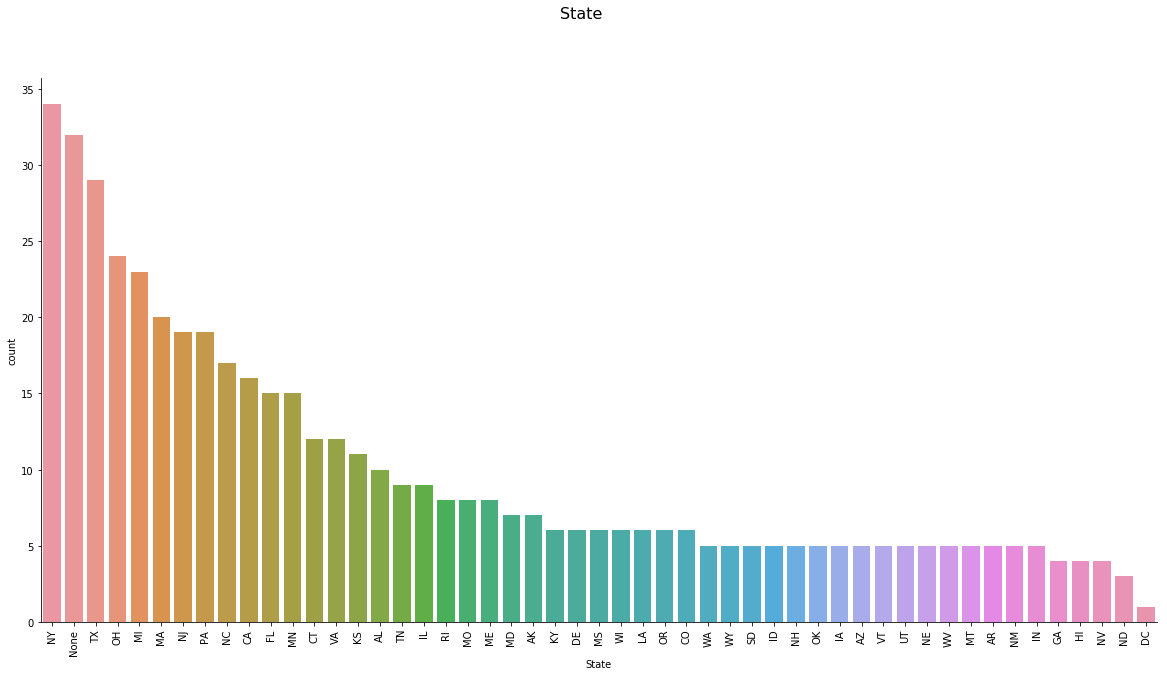

In [16]:

plt.figure(figsize=(20,10))
sns.countplot(x='State', data=events,order = events['State'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('State', fontsize=16)
sns.despine()



# counting zero values
#print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 0).sum())


Text(0.5,0.98,'Total of All Confirmed Gifts($) by Emails Sent')

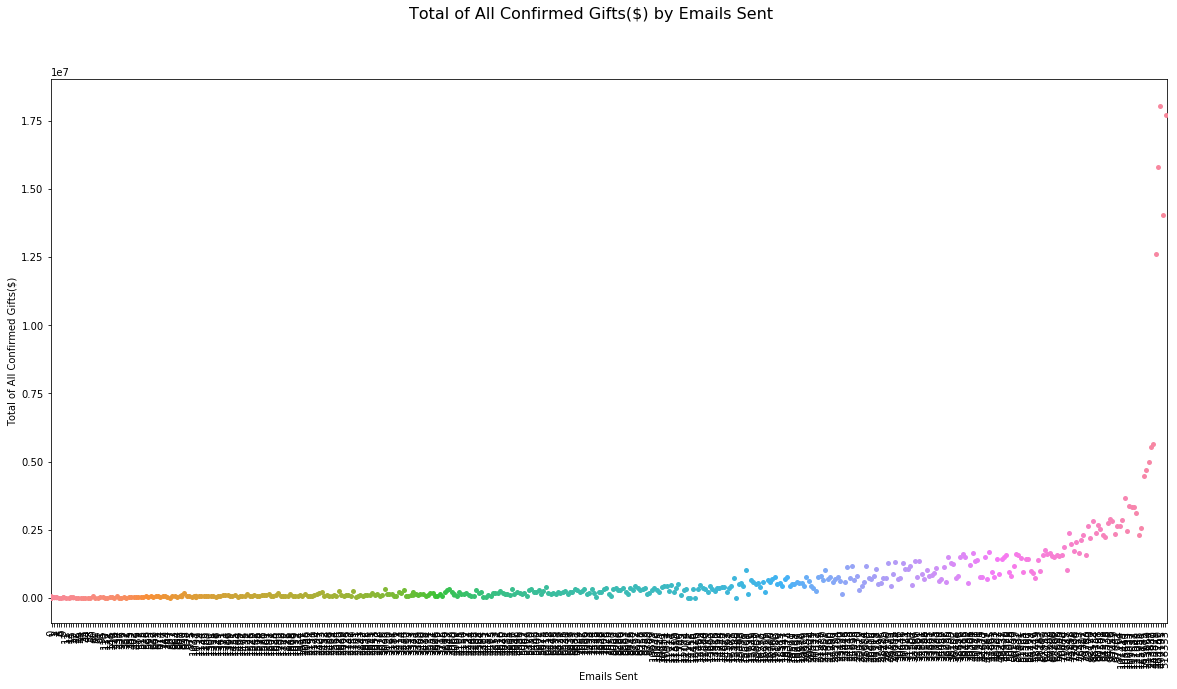

In [17]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Emails Sent", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by Emails Sent', fontsize=16)

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Average Team Size')

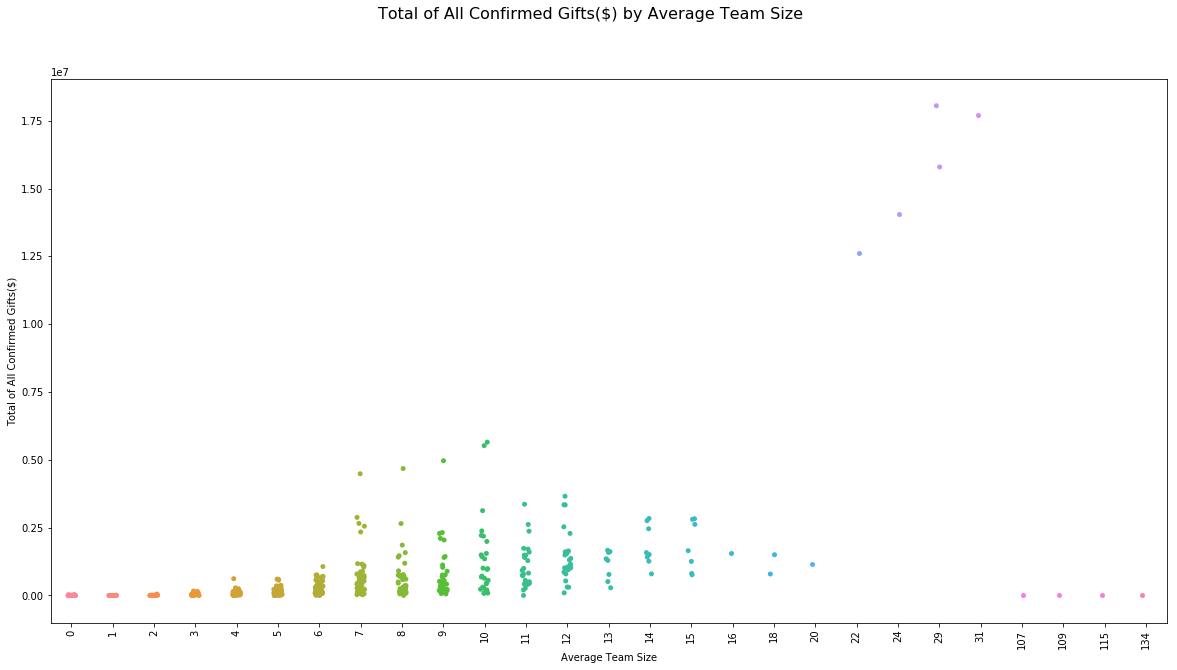

In [18]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Average Team Size", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by Average Team Size', fontsize=16)

Text(0.5,0.98,'Total of All Confirmed Gifts($) by State')

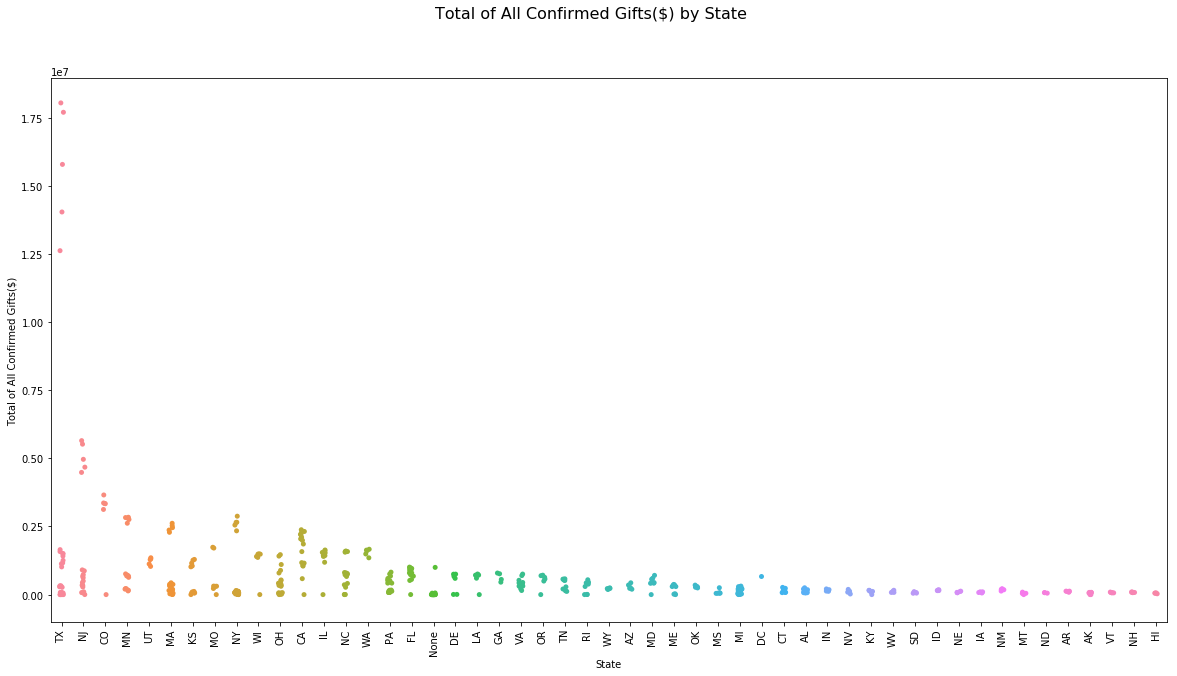

In [19]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total of All Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total of Online Gifts($) by State')

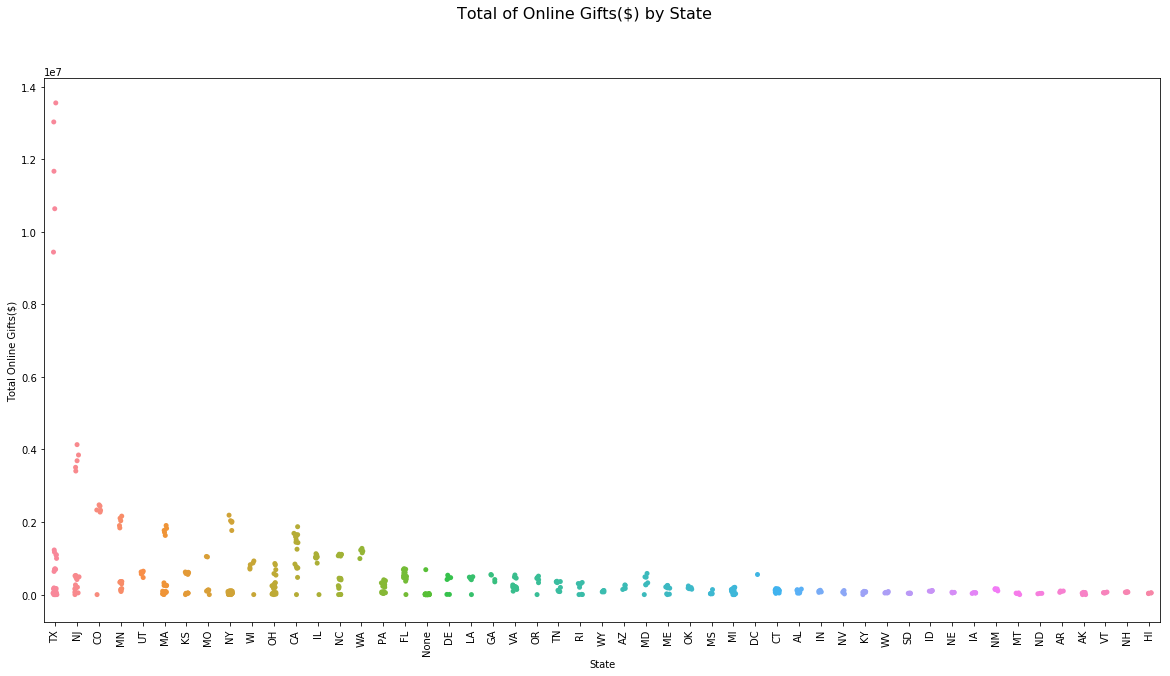

In [20]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Online Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total of Online Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total Offline Confirmed Gifts($) by State')

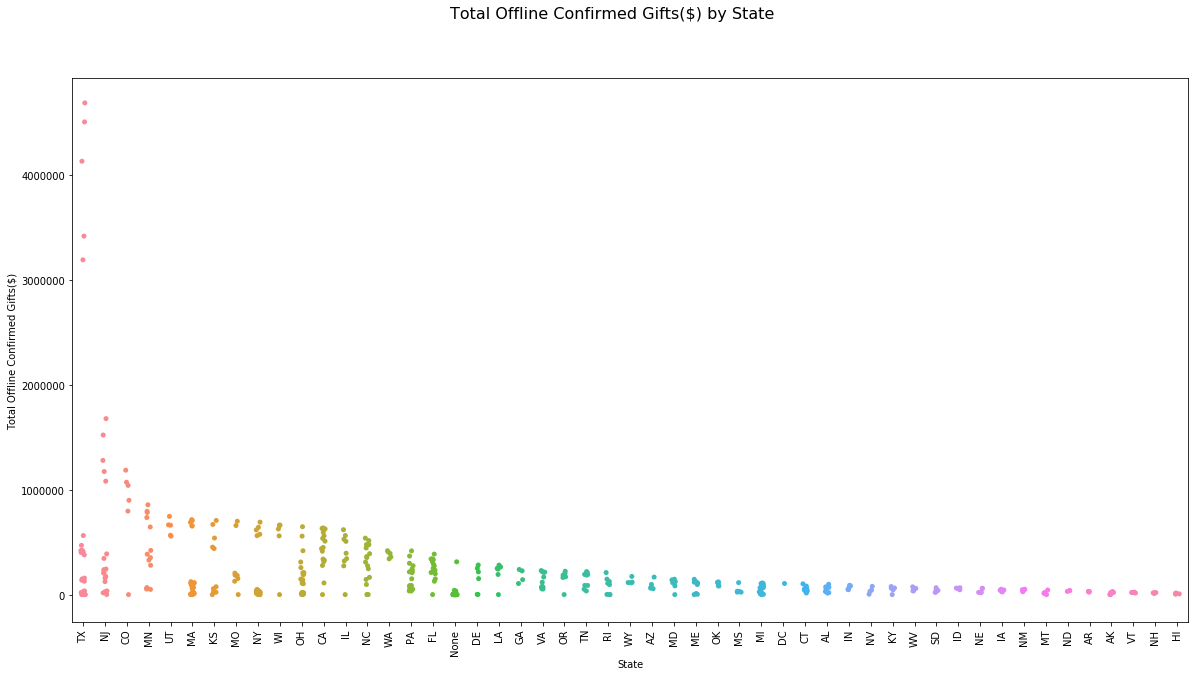

In [21]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Offline Confirmed Gifts($)",data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total Offline Confirmed Gifts($) by State', fontsize=16)

Text(0.5,0.98,'Total Event Gifts($)')

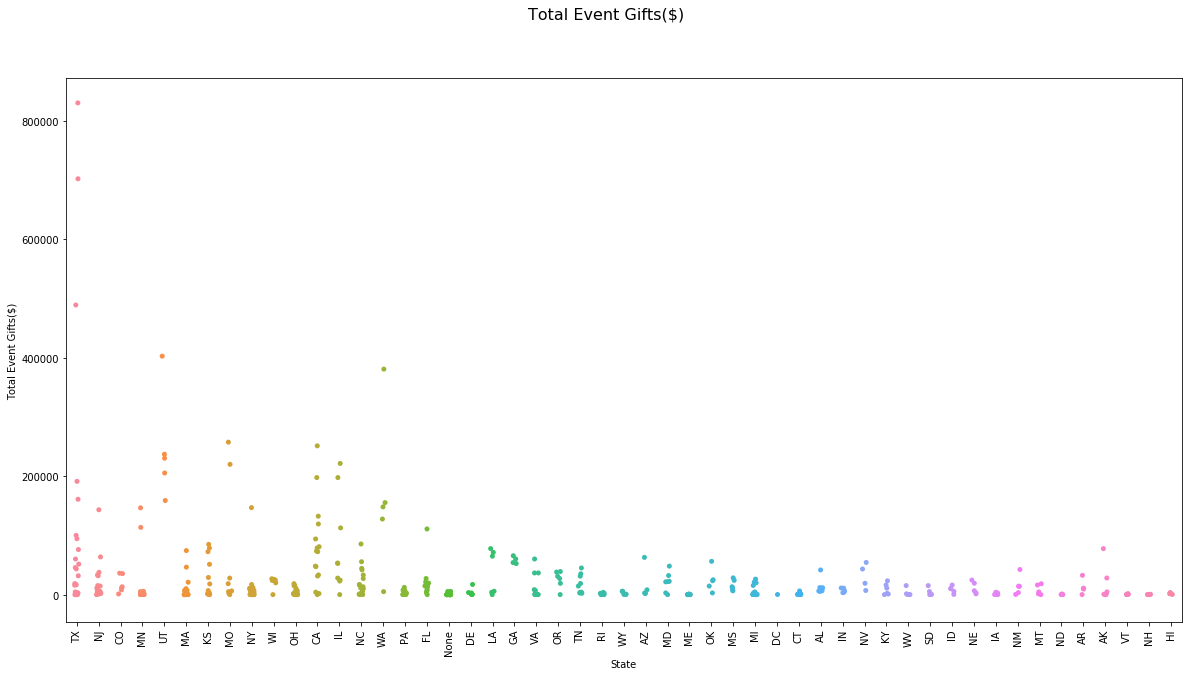

In [22]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Event Gifts($)", data=events, jitter=True, )
plt.xticks(rotation=90)

plt.suptitle('Total Event Gifts($)', fontsize=16)




Text(0.5,0.98,'Total Fees Paid ($)')

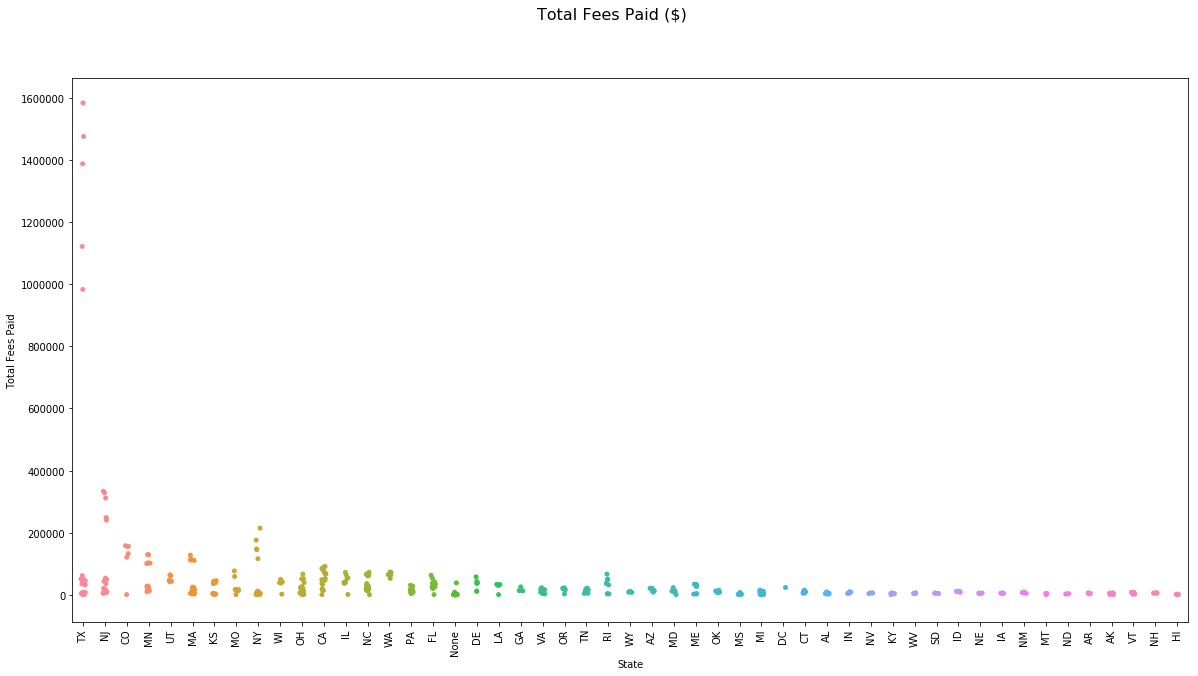

In [23]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Fees Paid", data=events, jitter=True, )
plt.xticks(rotation=90)

plt.suptitle('Total Fees Paid ($)', fontsize=16)

Text(0.5,0.98,'Total Team Gifts($)')

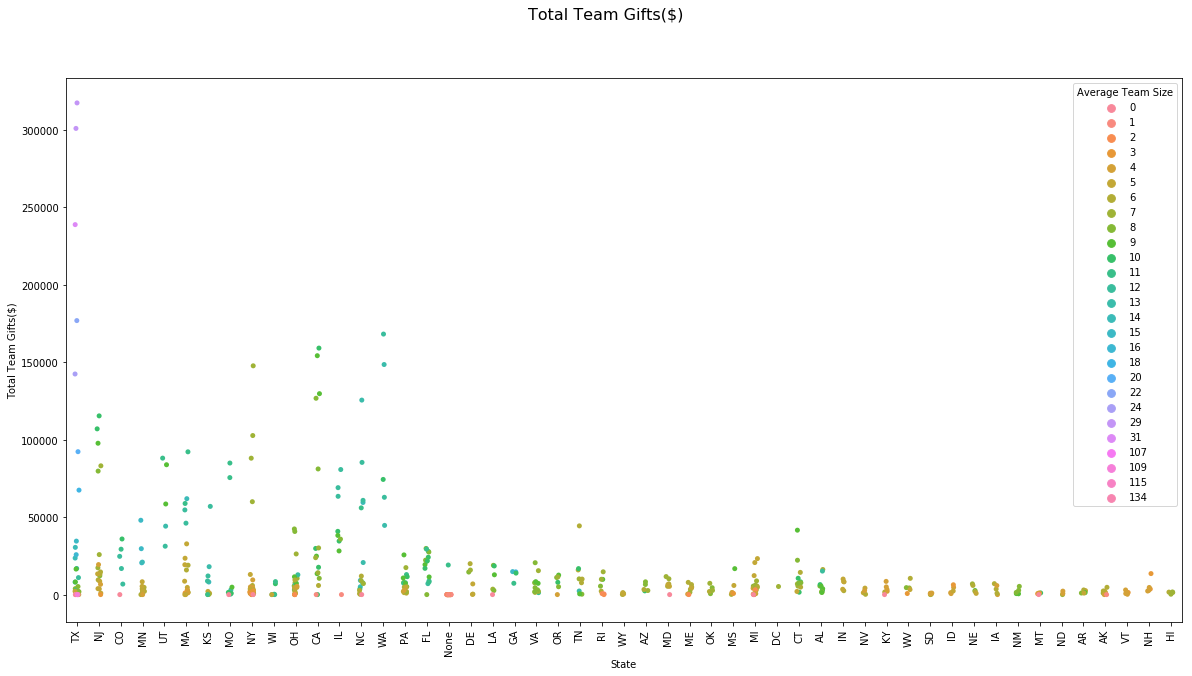

In [24]:
plt.figure(figsize=(20,10))

sns.stripplot(x="State", y="Total Team Gifts($)", hue="Average Team Size", data=events, jitter=True)
plt.xticks(rotation=90)

plt.suptitle('Total Team Gifts($)', fontsize=16)

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Event Month and Year')

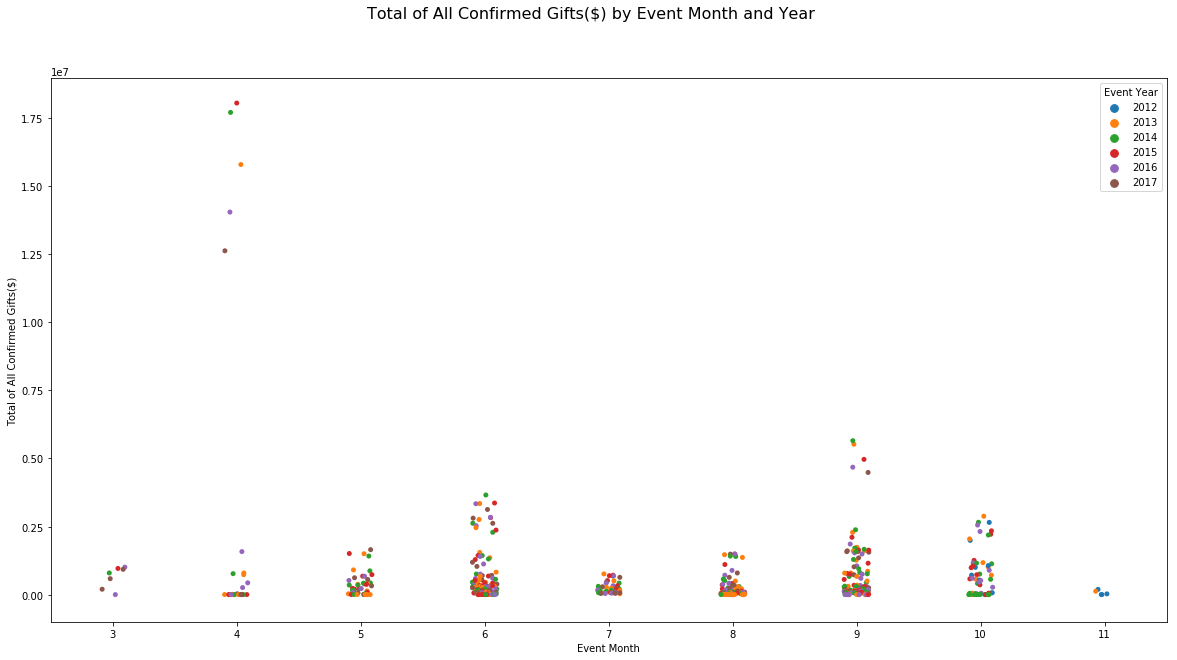

In [25]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Event Month", y="Total of All Confirmed Gifts($)",hue='Event Year',data=events, jitter=True)
#plt.xticks(rotation=90)

plt.suptitle('Total of All Confirmed Gifts($) by Event Month and Year', fontsize=16)

In [26]:
events=events.fillna(0)
events

,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Month,Event Day,Event Year,Event Goal($),...,Total Not From Participant($),Total Team Gifts($),Total Event Gifts($),Total Offline Unconfirmed Gifts($),Street Address,City,State,Zip Code,Internal Event Name,Previous Event ID
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12,4,12,2014,18500000,...,15720039.65,238928.16,76138.62,2203443.56,0,Houston,TX,77054.0,"Texas, Houston - 2014 BP MS 150",20226
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18,4,18,2015,20000000,...,16094744.58,317524.28,489288.48,2008521.85,0,Houston,TX,77054.0,"TXH Texas, Houston - 2015 BP MS 150 Houston to...",22598
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20,4,20,2013,18000000,...,14005042.20,301052.70,51485.89,44500.00,0,Houston,TX,77054.0,"Texas, Houston - 2013 BP MS 150",17896
3,2016,27003,TXH Bike Events,2016 BP MS 150,2015-08-31 09:45:00,2016-04-16,4,16,2016,20000000,...,12297590.45,142460.62,830681.60,859349.00,0,Houston,TX,77054.0,TXH 2016 Bike MS: BP MS 150,25298
4,2017,28263,TXH Bike Events,2017 BP MS 150,2016-08-24 11:31:00,2017-04-29,4,29,2017,16000000,...,11036115.68,176951.51,702497.83,829134.72,0,Houston,TX,77054.0,TXH 2017 Bike MS: BP MS 150,27003
5,2013,20331,PAE Bike Events,"New Jersey, Cherry Hill Bike MS: City to Shor...",2012-09-29 04:45:00,2013-09-28,9,28,2013,6000000,...,4726109.05,107034.78,5532.29,74850.57,0,"Cherry Hill, NJ with alternate start locations",NJ,8003.0,PAE0EMS120130928CTS - Bike MS: City to Shore R...,17956
6,2014,22817,PAE Bike Events,"New Jersey, Cherry Hill Bike MS: City to Shor...",2013-09-10 14:57:00,2014-09-27,9,27,2014,6000000,...,4781696.66,115415.60,4586.24,69444.78,0,Cherry Hill,NJ,8002.0,"PAE0EMS120140927CTS - New Jersey, Cherry Hill ...",20331
7,2015,25223,PAE Bike Events,Bike MS: City to Shore Ride 2015,2014-09-19 15:18:00,2015-09-26,9,26,2015,6600000,...,4151307.23,97741.24,10824.19,58421.00,0,Cherry Hill,NJ,8003.0,PAE0EMS120150926CTS Bike MS: City to Shore Rid...,22817
8,2014,22980,COC Bike Events,Newmont Bike MS 2014 presented by Point B,2013-09-24 22:56:00,2014-06-28,6,28,2014,3925000,...,3219345.67,16832.08,11611.89,38027.50,3645 W 112th Ave,Westminster,CO,80031.0,Colorado - Bike MS 2014,20901
9,2016,27061,PAE Bike Events,Bike MS: City to Shore Ride 2016,2015-09-18 08:28:00,2016-09-24,9,24,2016,6600000,...,3846817.08,79763.90,63607.09,94526.00,0,Cherry Hill,NJ,8003.0,PAE0EMS120160924CTS - PAE 2016 Bike MS: City t...,25223


In [27]:
#How many events per year
events['Event Year'].value_counts()




2013    121
2014    113
2015    103
2016     98
2017     75
2012     14
Name: Event Year, dtype: int64

In [28]:
# How many events are there for each month?
events['Event Month'].value_counts()

9     147
6     110
8      87
10     60
5      42
7      41
4      25
3       7
11      5
Name: Event Month, dtype: int64

In [29]:
# Get the first entry for each month
events.groupby('Event Month').first()



,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Day,Event Year,Event Goal($),Active Registrations,...,Total Not From Participant($),Total Team Gifts($),Total Event Gifts($),Total Offline Unconfirmed Gifts($),Street Address,City,State,Zip Code,Internal Event Name,Previous Event ID
Event Month,,,,,,,,,,,,,,,,,,,,,
3,2016,26536,FLS Bike Events,Bike MS: Breakaway to Key Largo 2016,2015-06-09 13:48:00,2016-03-05,5,2016,1050000,1566,...,870113.36,16954.82,19430.16,20874.00,11310 SW 17th Street,Miami,FL,33199.0,FLS 2016 Bike MS: Breakaway to Key Largo,24696
4,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12,12,2014,18500000,14871,...,15720039.65,238928.16,76138.62,2203443.56,0,Houston,TX,77054.0,"Texas, Houston - 2014 BP MS 150",20226
5,2017,28791,TXH Bike Events,Bike MS: Sam's Club Round-Up Ride 2017,2016-09-22 15:03:00,2017-05-06,6,2017,1800000,1858,...,1409237.08,34535.27,94371.00,83315.00,7300 Rough Riders Trl.,Frisco,TX,75034.0,TXH 2017 Bike MS: Dallas,27149
6,2014,22980,COC Bike Events,Newmont Bike MS 2014 presented by Point B,2013-09-24 22:56:00,2014-06-28,28,2014,3925000,3299,...,3219345.67,16832.08,11611.89,38027.50,3645 W 112th Ave,Westminster,CO,80031.0,Colorado - Bike MS 2014,20901
7,2013,19656,MNM Bike Events,Minnesota - Bike MS: TRAM Ride 2013,2012-07-25 15:13:00,2013-07-14,14,2013,850000,850,...,708796.14,0.00,50.00,0.00,0,International Falls to Duluth,MN,55805.0,Minnesota - Bike MS: TRAM Ride 2013,17619
8,2013,19765,WIG Bike Events,"Wisconsin, Pewaukee - Bike MS 2013: TOYOTA Bes...",2012-08-02 11:52:00,2013-08-03,3,2013,1500000,1824,...,1179023.29,0.00,23752.00,45.00,800 Main Street,Pewaukee,WI,53072.0,Wisconsin Bike MS: Best Dam Bike Ride 2013,17735
9,2013,20331,PAE Bike Events,"New Jersey, Cherry Hill Bike MS: City to Shor...",2012-09-29 04:45:00,2013-09-28,28,2013,6000000,9792,...,4726109.05,107034.78,5532.29,74850.57,0,"Cherry Hill, NJ with alternate start locations",NJ,8003.0,PAE0EMS120130928CTS - Bike MS: City to Shore R...,17956
10,2014,21176,NYN Bike Events,Bike MS: New York City 2013,2012-12-05 13:04:00,2013-10-06,6,2013,2750000,5206,...,2484714.46,59991.00,3008.63,29828.01,0,New York City,NY,10019.0,NYN 2013 Bike MS New York City,18354
11,2013,18743,CAL Bike Events,Bike MS: Vegas Challenge 2012,2012-01-05 13:02:00,2012-11-10,10,2012,250000,391,...,166760.00,1180.00,54341.58,2550.00,0,Las Vegas,NV,0.0,"CAL, Vegas - Bike MS: Vegas Challenge 2012",17042


In [30]:
# Get the sum of the total gifts per month
events.groupby('Event Month')['Total of All Confirmed Gifts($)'].sum()



Event Month
3      4474027.55
4     82839077.38
5     16743636.68
6     75418910.35
7     10915665.34
8     23668253.23
9     89860775.48
10    43938358.38
11      342419.09
Name: Total of All Confirmed Gifts($), dtype: float64

In [31]:
# Get the number of dates / events in each month
events.groupby('Event Month')['Event Date'].count()

Event Month
3       7
4      25
5      42
6     110
7      41
8      87
9     147
10     60
11      5
Name: Event Date, dtype: int64

In [32]:
events.groupby('State')['Total of All Confirmed Gifts($)'].sum()

State
0          61204.43
AK        369480.37
AL       1290210.88
AR        564307.22
AZ       1467347.54
CA      25987468.73
CO      16827824.27
CT       1979971.48
DC        677556.52
DE       2776472.56
FL      11429474.62
GA       2568554.60
HI        199659.60
IA        419340.70
ID        788452.62
IL      11779429.13
IN        783698.94
KS       6171989.71
KY        670160.66
LA       3515038.02
MA      15041175.96
MD       3143226.46
ME       1706433.68
MI       3341823.72
MN      18249616.74
MO       4864457.48
MS        520756.60
MT        231170.90
NC      13472777.99
ND        196313.77
NE        462187.76
NH        417411.44
NJ      31248246.41
NM        911541.78
NV        426924.64
NY      15051345.66
None     1235069.58
OH       9954555.77
OK       1435445.99
OR       3109034.57
PA       6703610.63
RI       2120461.08
SD        366778.32
TN       3501905.41
TX      92217944.53
UT       6104394.35
VA       4849428.61
VT        368463.05
WA       7754724.62
WI       72295

Text(0,0.5,'Gift amount')

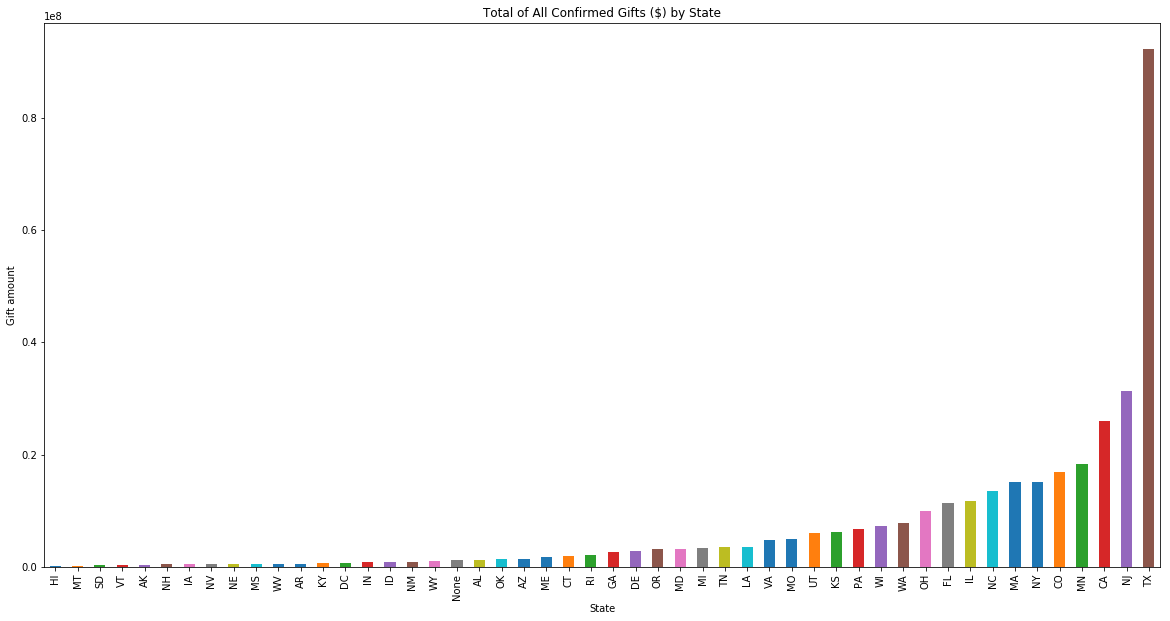

In [33]:

# What total gifts for all states
plt.figure(figsize=(20,10))
plot_data =events.groupby('State')['Total of All Confirmed Gifts($)'].sum()
plot_data.sort_values()[-50:].plot(kind='bar')
plt.title("Total of All Confirmed Gifts ($) by State")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

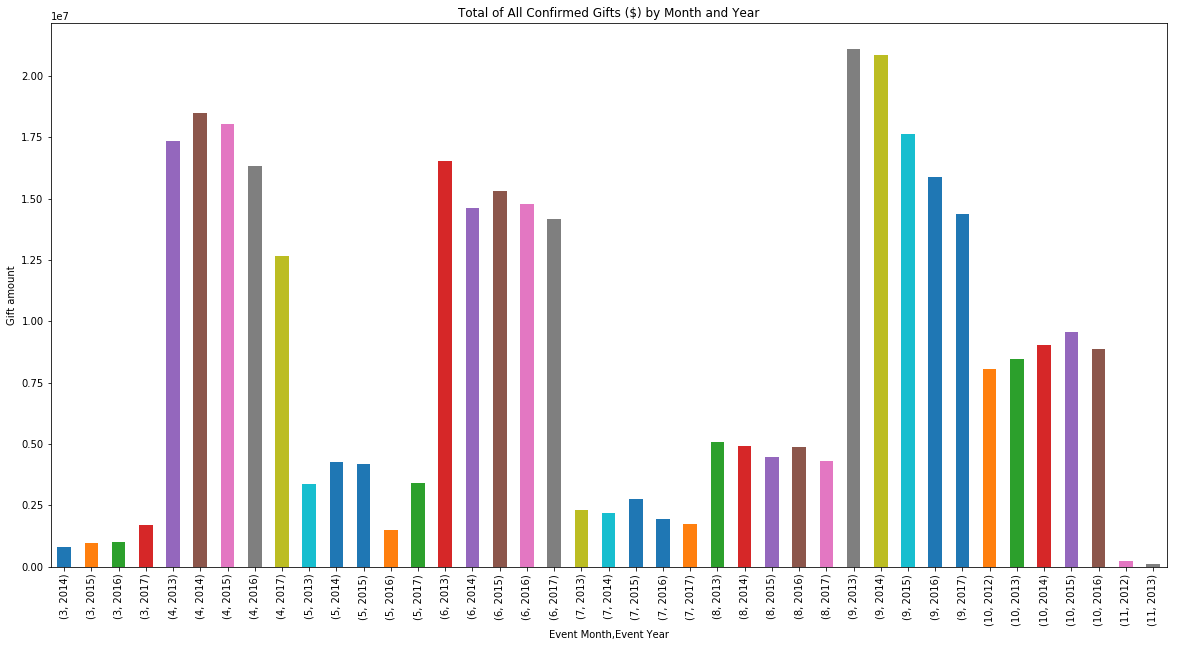

In [34]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =events.groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

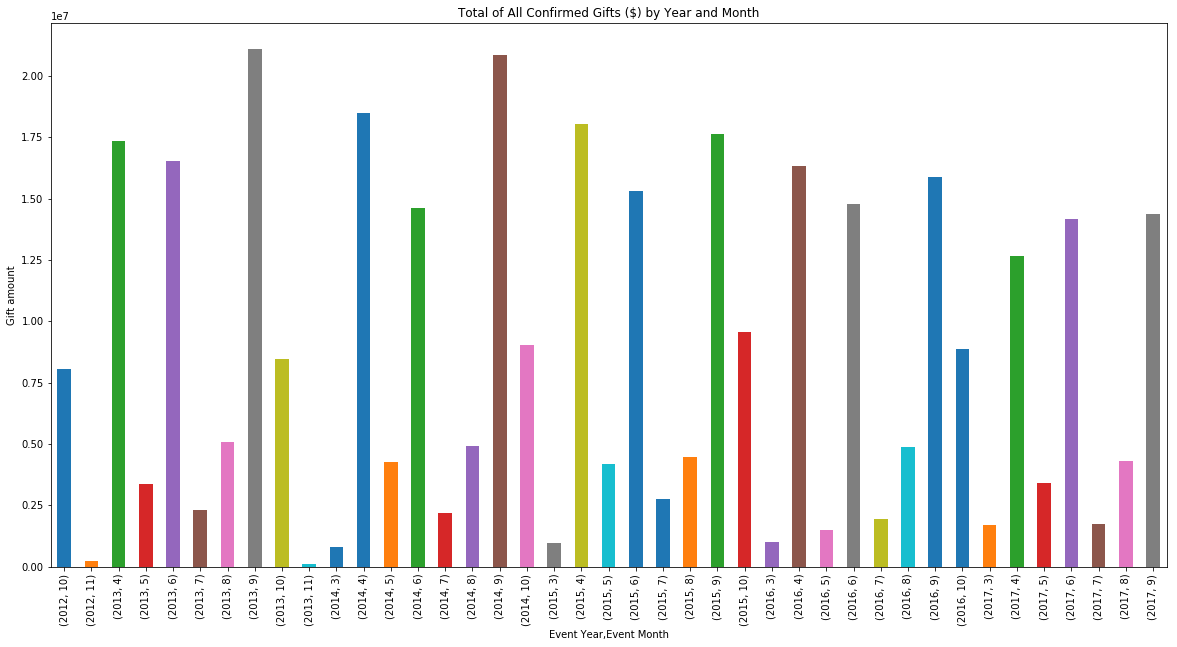

In [35]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =events.groupby(['Event Year','Event Month'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Total of All Confirmed Gifts ($) by Year and Month")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

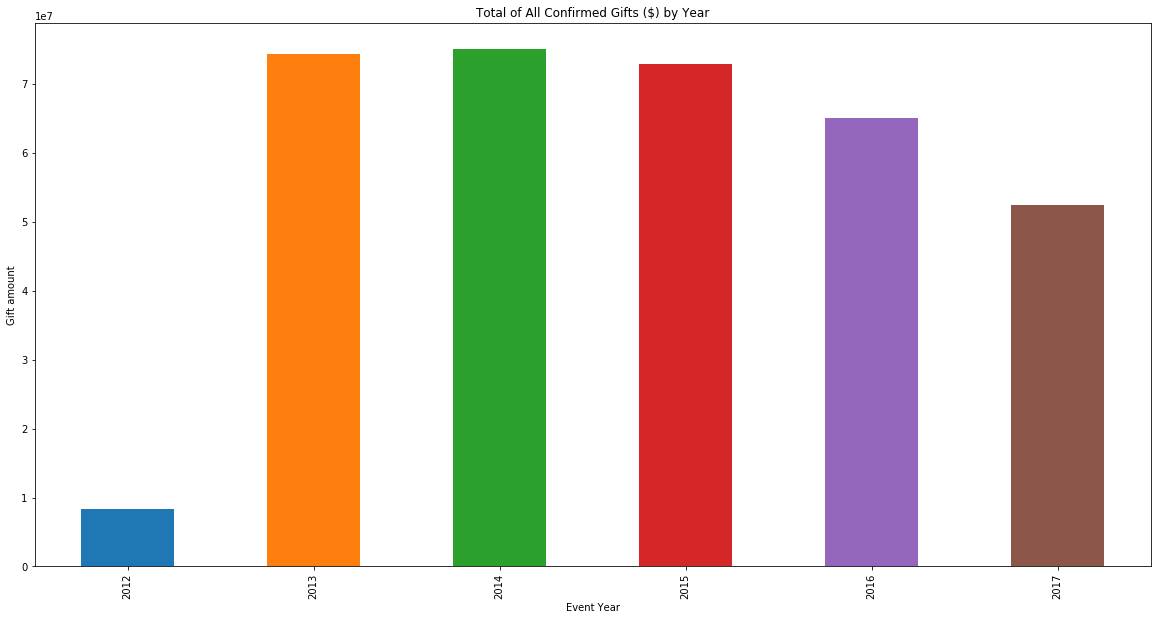

In [36]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =events.groupby(['Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Total of All Confirmed Gifts ($) by Year")
plt.ylabel("Gift amount")

In [37]:
# Total Gifts by month, year and state
events.groupby(['Event Month','Event Year','State'])['Total of All Confirmed Gifts($)'].sum()






Event Month  Event Year  State
3            2014        FL         794505.67
             2015        FL         960371.55
             2016        AK              0.00
                         FL        1008550.36
             2017        AZ         197481.41
                         CA         584757.07
                         FL         928361.49
4            2013        0              70.00
                         FL        1527635.38
                         RI           2535.00
                         TX       15794142.67
             2014        0             560.00
                         FL         768752.88
                         RI           7985.00
                         TX       17707943.53
             2015        0             175.00
                         TX       18052444.81
             2016        0            4631.00
                         AZ         257612.24
                         MA         432238.54
                         TX       15626994.36
   

In [38]:
# Total Gifts by month, year and state
events.groupby(['State','Event Year','Event Month',])['Total of All Confirmed Gifts($)'].sum()

State  Event Year  Event Month
0      2012        10                2090.00
                   11                  75.00
       2013        4                   70.00
                   5                    0.00
                   10                 720.00
       2014        4                  560.00
                   6                 2116.00
                   8                  634.00
       2015        4                  175.00
                   5                 1507.00
                   6                 1610.00
                   8                    0.00
                   9                16561.43
       2016        4                 4631.00
                   9                    0.00
       2017        4                29140.00
                   5                 1255.00
                   9                   60.00
AK     2013        9                67706.74
       2014        5                82342.00
       2015        5                80266.11
       2016        3    

Text(0,0.5,'Gift amount')

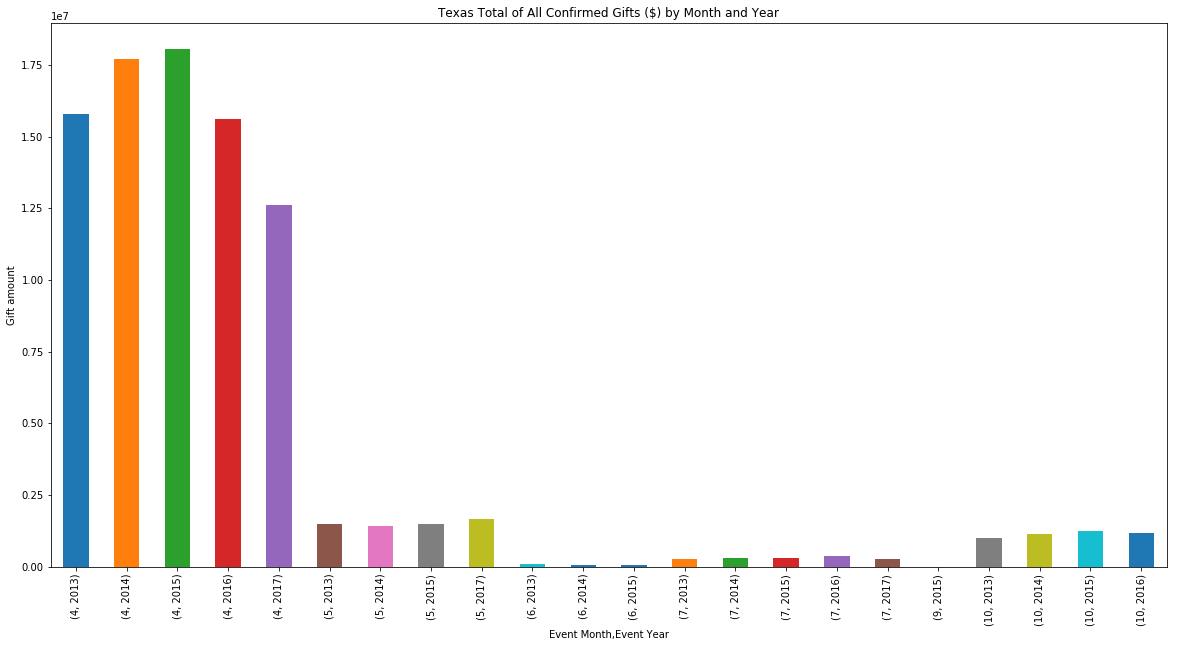

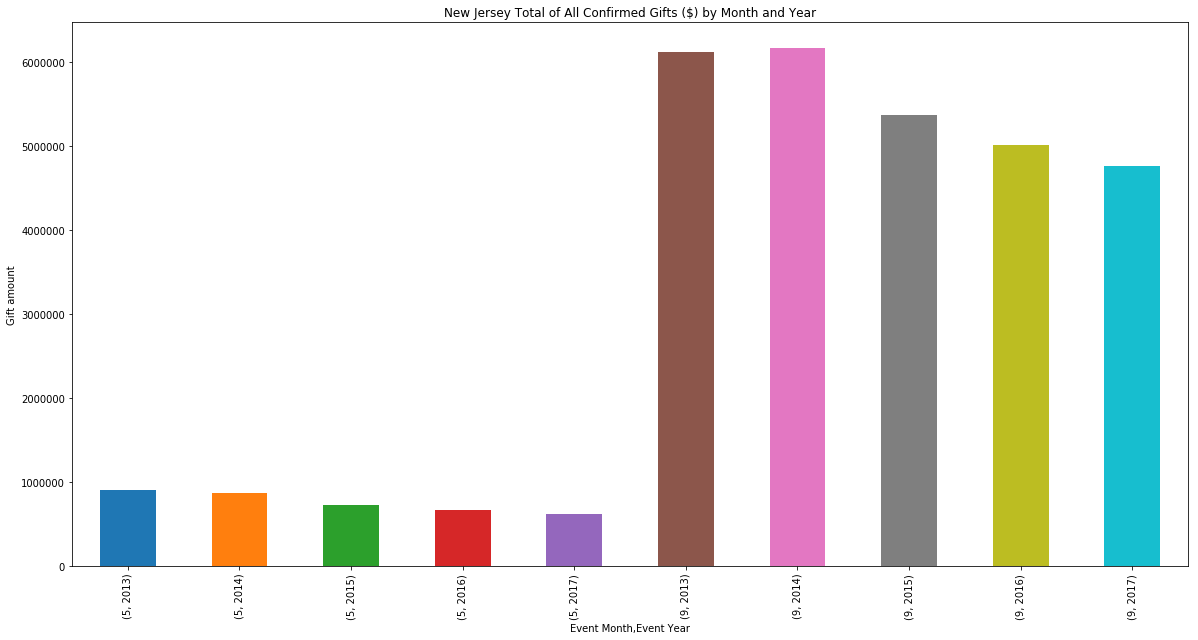

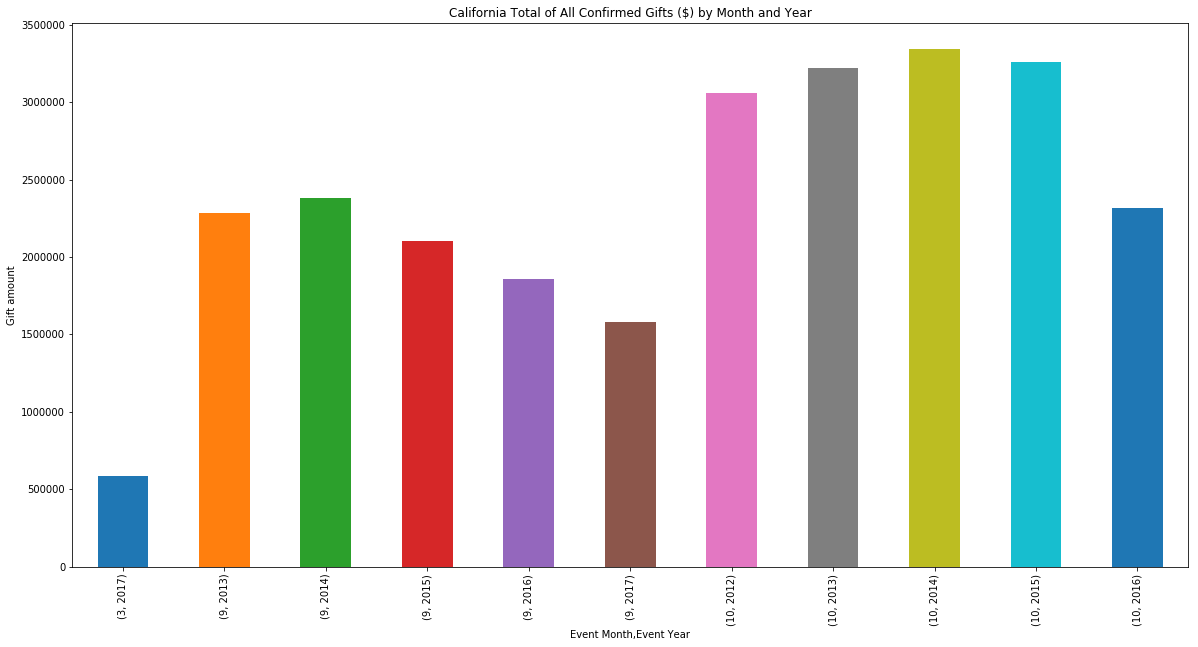

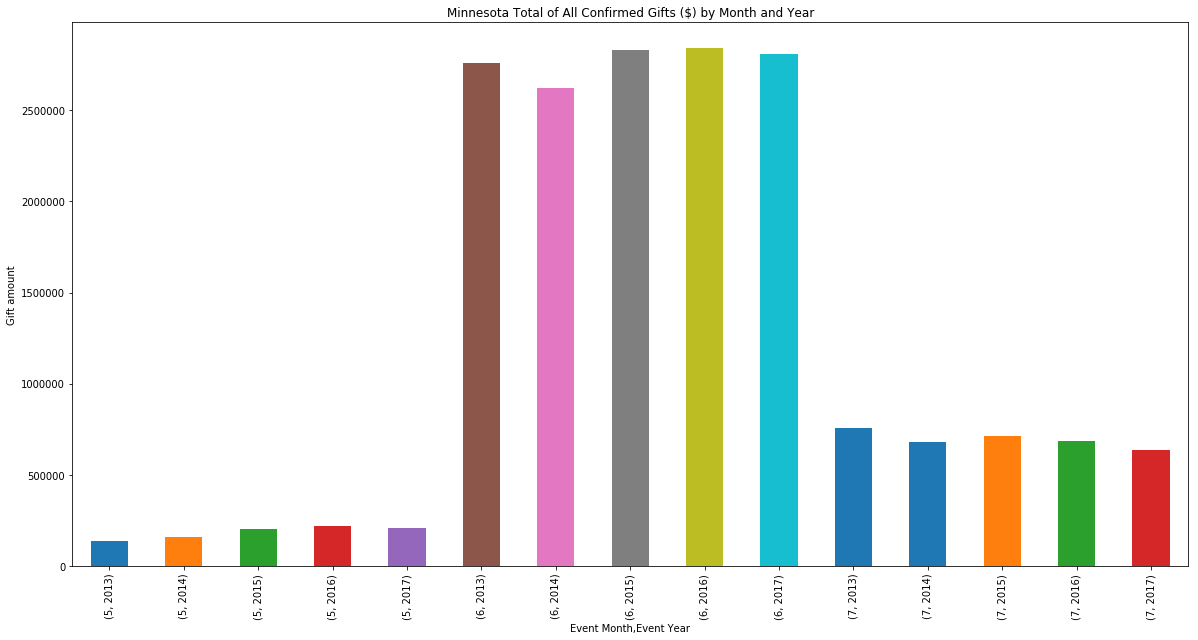

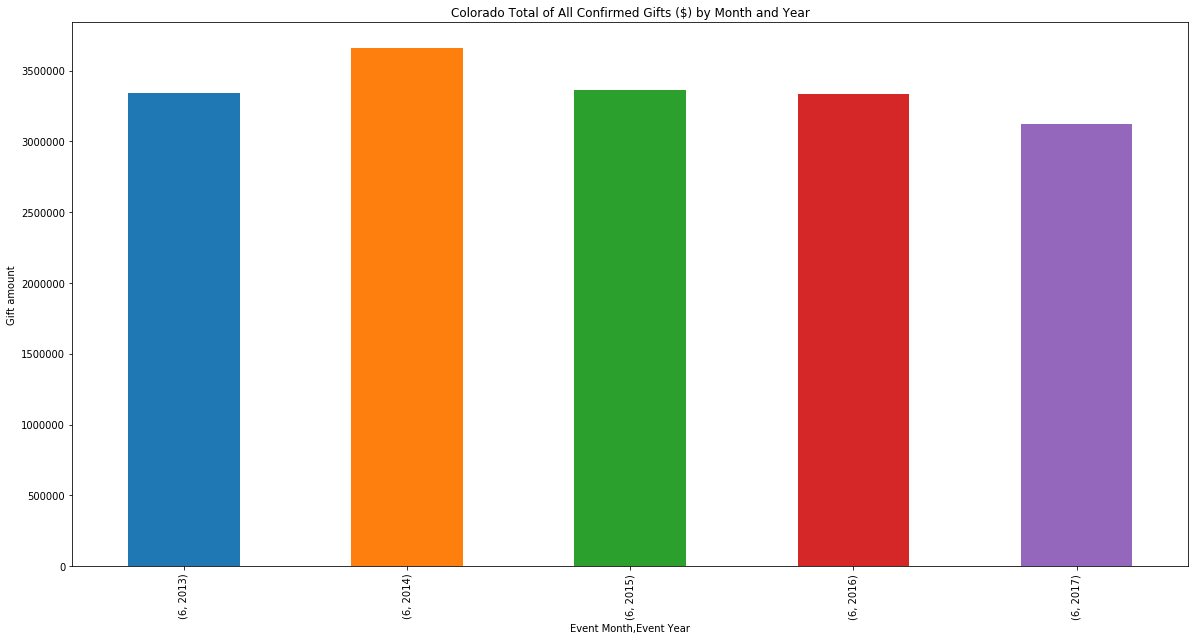

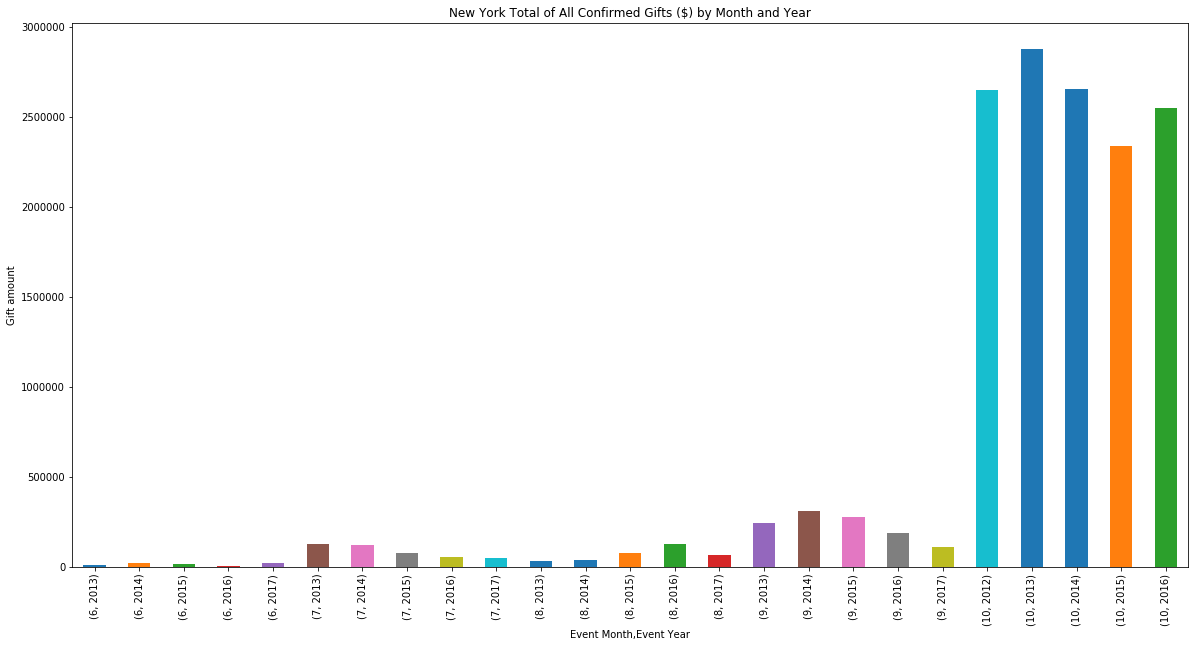

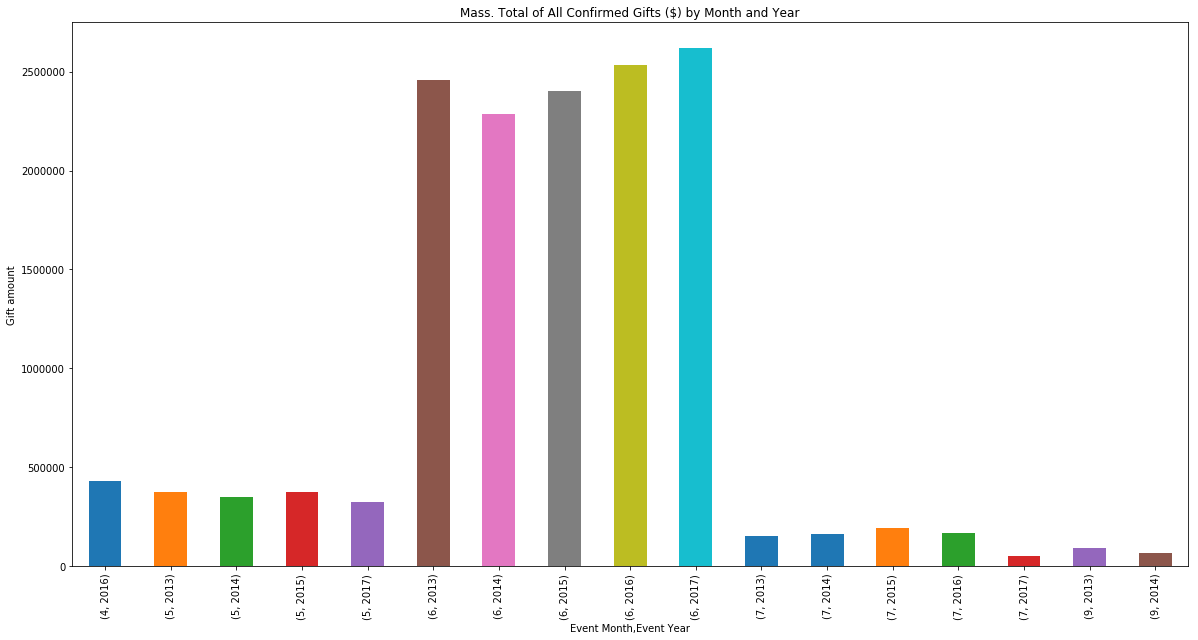

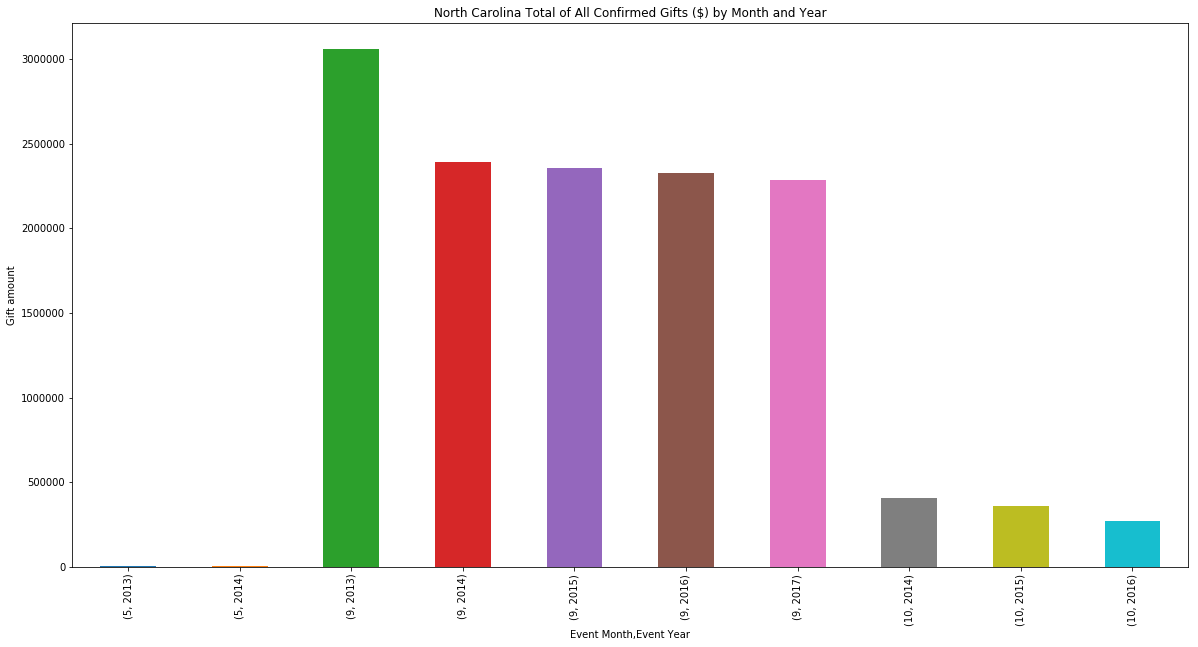

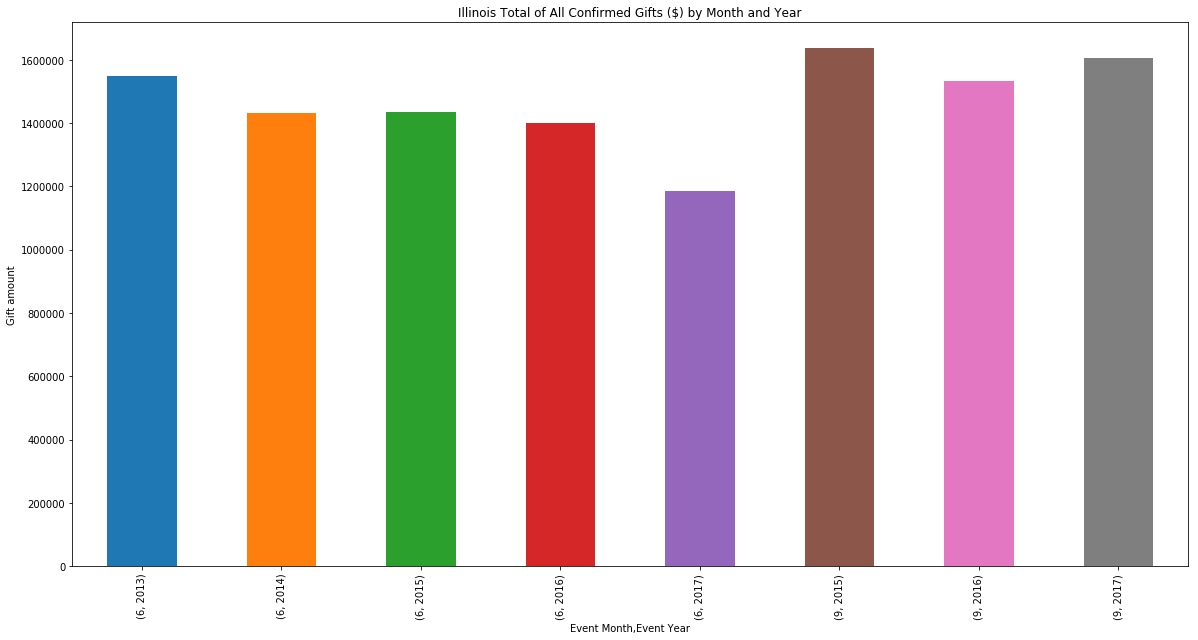

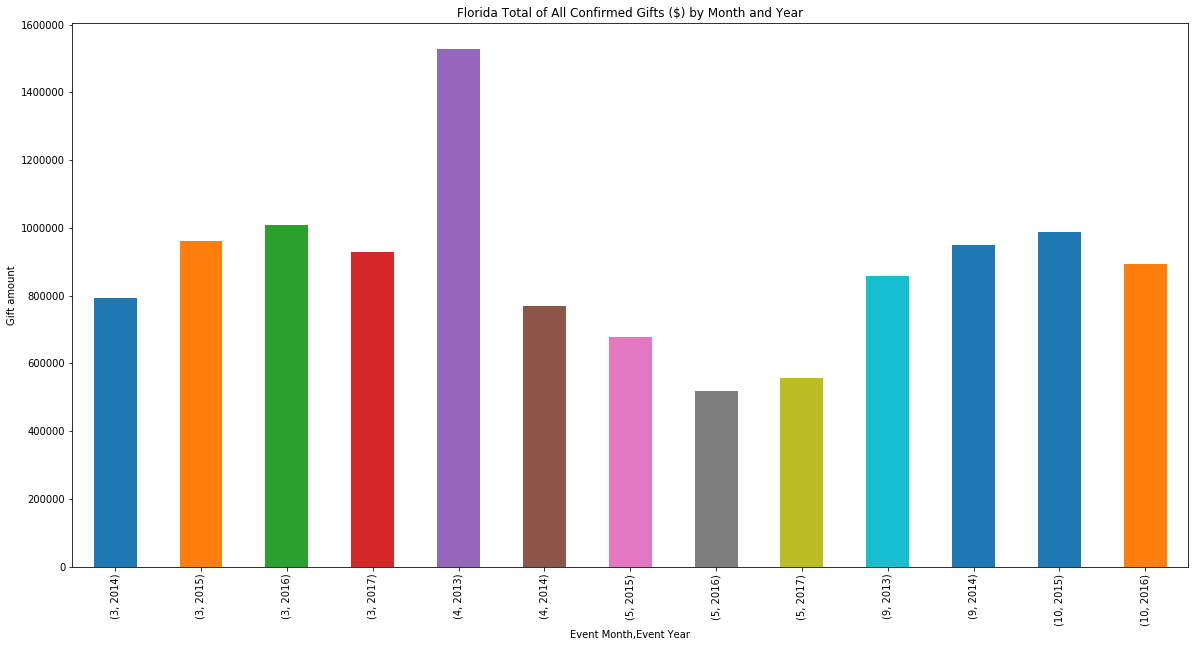

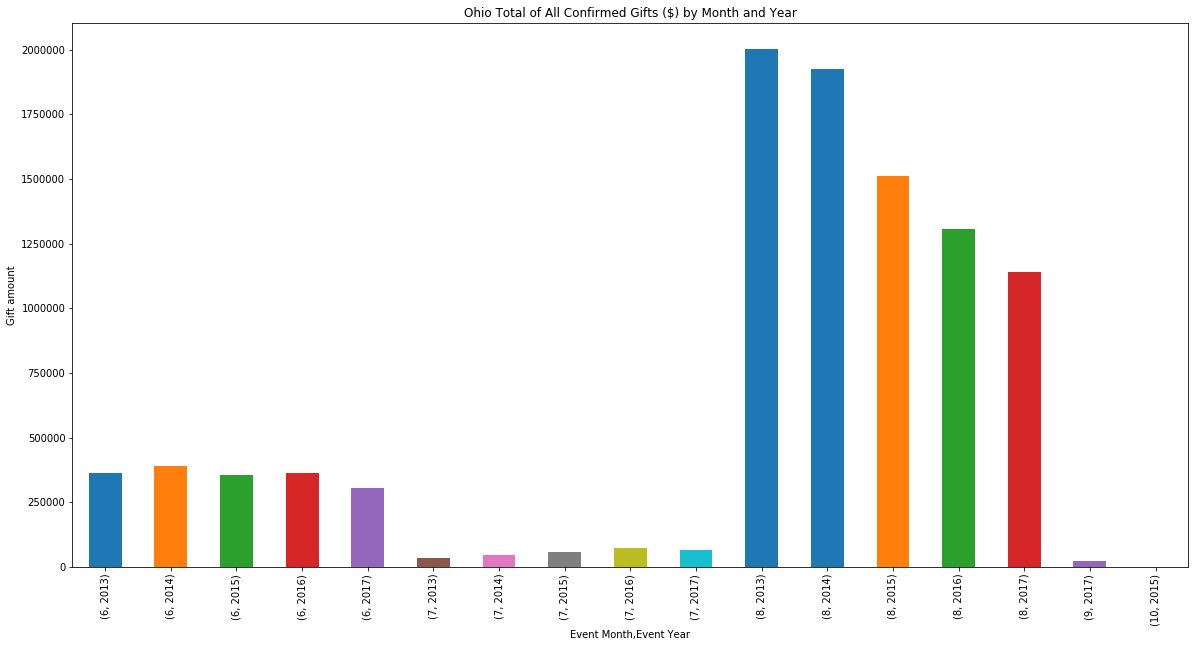

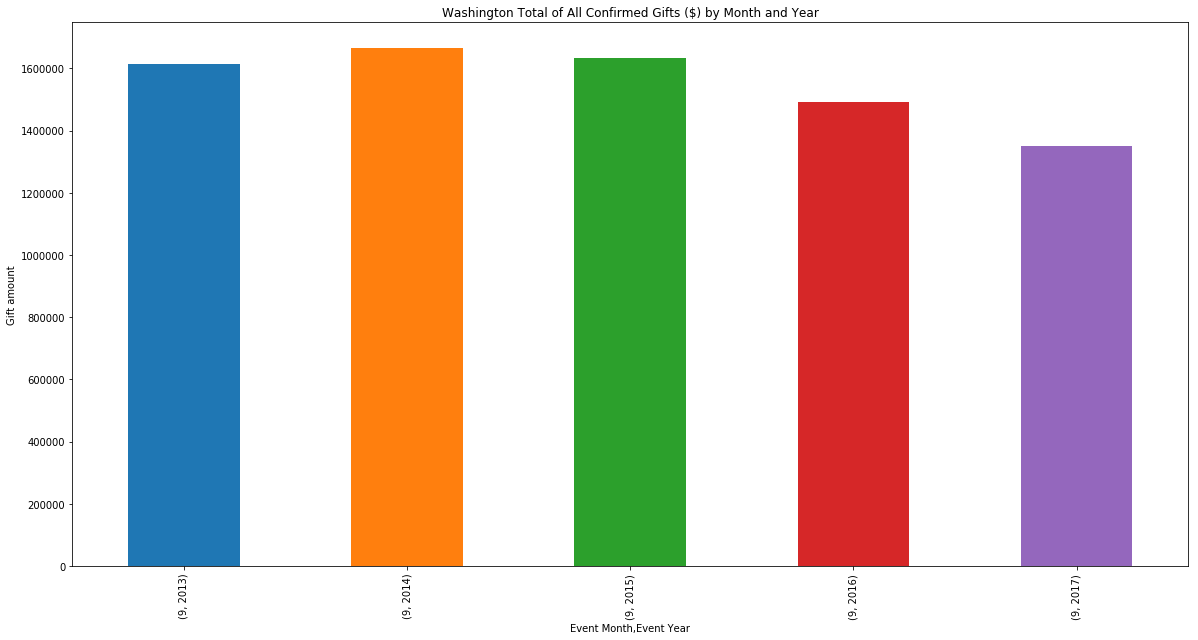

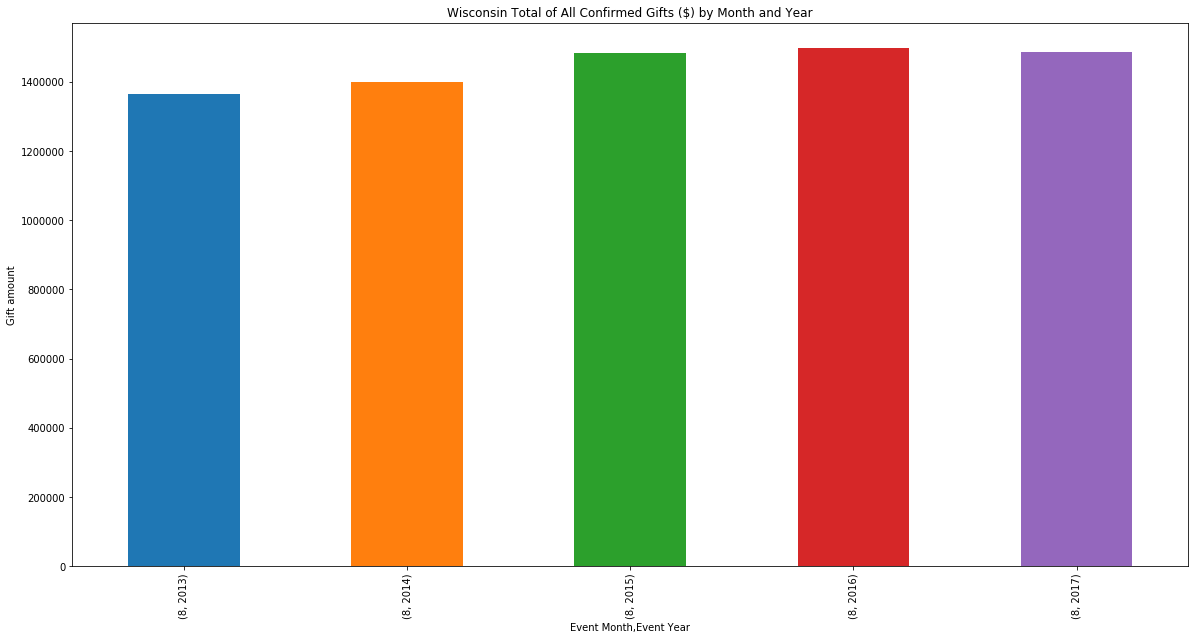

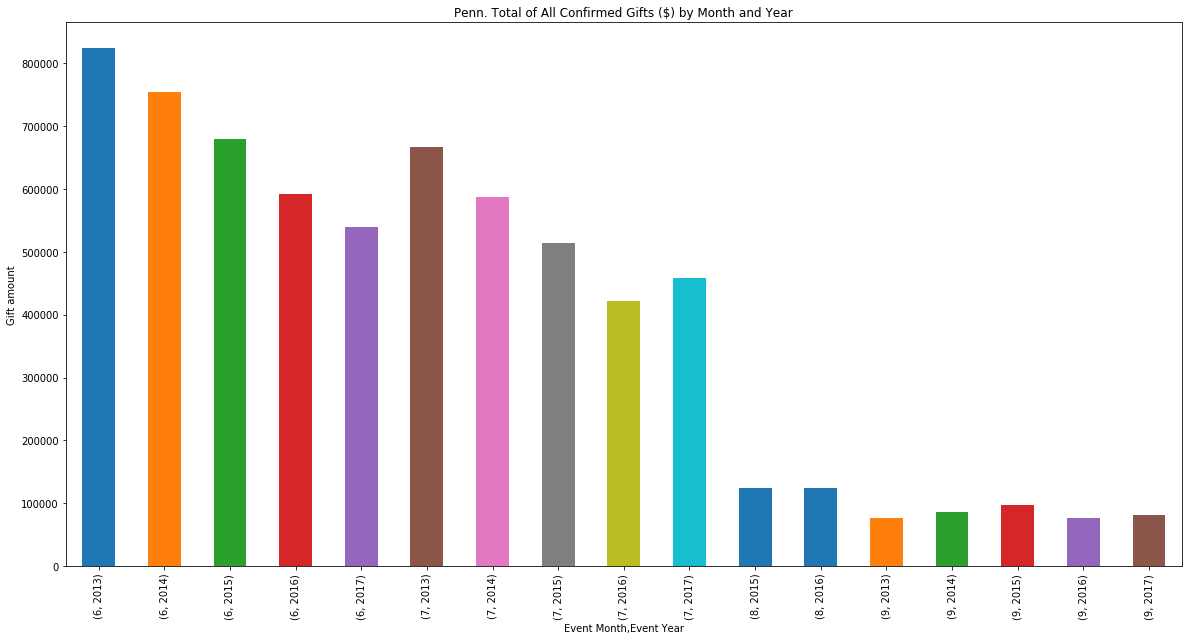

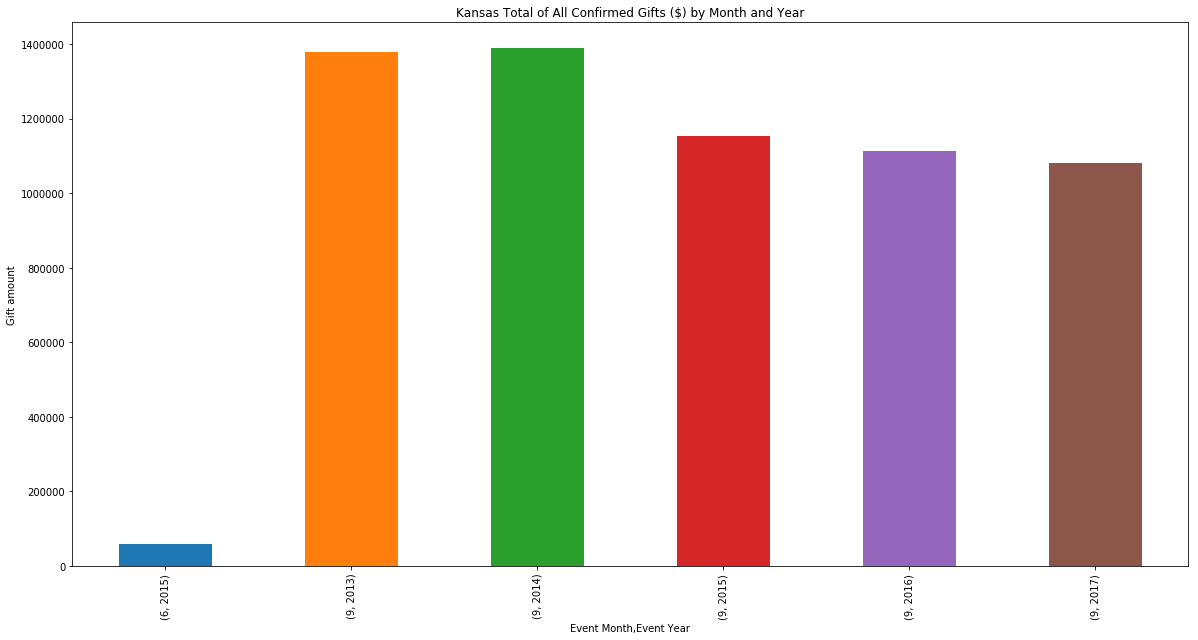

In [39]:
# sum of total gifts by month and year top 15 states

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'TX'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Texas Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'NJ'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("New Jersey Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'CA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("California Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'MN'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Minnesota Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'CO'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Colorado Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'NY'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("New York Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")


plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'MA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Mass. Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'NC'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("North Carolina Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'IL'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Illinois Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'FL'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Florida Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'OH'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Ohio Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'WA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Washington Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'WI'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Wisconsin Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'PA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Penn. Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

plt.figure(figsize=(20,10))
plot_data =events[events['State'] == 'KS'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Kansas Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

# Describing Data

In [40]:
dummy = pd.get_dummies(events['State'])
eventsd = pd.concat([events, dummy],axis=1)
eventsd.head()


,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Month,Event Day,Event Year,Event Goal($),...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12,4,12,2014,18500000,...,0,0,1,0,0,0,0,0,0,0
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18,4,18,2015,20000000,...,0,0,1,0,0,0,0,0,0,0
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20,4,20,2013,18000000,...,0,0,1,0,0,0,0,0,0,0
3,2016,27003,TXH Bike Events,2016 BP MS 150,2015-08-31 09:45:00,2016-04-16,4,16,2016,20000000,...,0,0,1,0,0,0,0,0,0,0
4,2017,28263,TXH Bike Events,2017 BP MS 150,2016-08-24 11:31:00,2017-04-29,4,29,2017,16000000,...,0,0,1,0,0,0,0,0,0,0


In [41]:
eventsd=eventsd.fillna(0)
eventsd

,Fiscal Year,Event ID,Security Category Name,Public Event Name,Event Created Date,Event Date,Event Month,Event Day,Event Year,Event Goal($),...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2014,22598,TXH Bike Events,"Texas, Houston - 2014 BP MS 150",2013-08-15 16:01:00,2014-04-12,4,12,2014,18500000,...,0,0,1,0,0,0,0,0,0,0
1,2015,25298,TXH Bike Events,2015 BP MS 150,2014-09-26 12:54:00,2015-04-18,4,18,2015,20000000,...,0,0,1,0,0,0,0,0,0,0
2,2013,20226,TXH Bike Events,2013 BP MS 150,2012-09-19 14:23:00,2013-04-20,4,20,2013,18000000,...,0,0,1,0,0,0,0,0,0,0
3,2016,27003,TXH Bike Events,2016 BP MS 150,2015-08-31 09:45:00,2016-04-16,4,16,2016,20000000,...,0,0,1,0,0,0,0,0,0,0
4,2017,28263,TXH Bike Events,2017 BP MS 150,2016-08-24 11:31:00,2017-04-29,4,29,2017,16000000,...,0,0,1,0,0,0,0,0,0,0
5,2013,20331,PAE Bike Events,"New Jersey, Cherry Hill Bike MS: City to Shor...",2012-09-29 04:45:00,2013-09-28,9,28,2013,6000000,...,0,0,0,0,0,0,0,0,0,0
6,2014,22817,PAE Bike Events,"New Jersey, Cherry Hill Bike MS: City to Shor...",2013-09-10 14:57:00,2014-09-27,9,27,2014,6000000,...,0,0,0,0,0,0,0,0,0,0
7,2015,25223,PAE Bike Events,Bike MS: City to Shore Ride 2015,2014-09-19 15:18:00,2015-09-26,9,26,2015,6600000,...,0,0,0,0,0,0,0,0,0,0
8,2014,22980,COC Bike Events,Newmont Bike MS 2014 presented by Point B,2013-09-24 22:56:00,2014-06-28,6,28,2014,3925000,...,0,0,0,0,0,0,0,0,0,0
9,2016,27061,PAE Bike Events,Bike MS: City to Shore Ride 2016,2015-09-18 08:28:00,2016-09-24,9,24,2016,6600000,...,0,0,0,0,0,0,0,0,0,0


In [42]:
eventsd.describe()

,Fiscal Year,Event ID,Event Month,Event Day,Event Year,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,Total of All Confirmed Gifts($),...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,524.000000,524.000000,524.000000,524.000000,524.000000,5.240000e+02,524.000000,524.000000,5.240000e+02,5.240000e+02,...,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,2014.811069,24519.307252,7.541985,14.215649,2014.715649,8.591983e+05,904.786260,34.221374,3.521103e+04,6.645060e+05,...,0.009542,0.017176,0.055344,0.009542,0.022901,0.009542,0.009542,0.011450,0.009542,0.009542
std,1.407638,3028.272539,1.832402,8.569437,1.436104,1.992613e+06,1670.583736,96.799613,1.334289e+05,1.691521e+06,...,0.097309,0.130049,0.228868,0.097309,0.149730,0.097309,0.097309,0.106494,0.097309,0.097309
min,2013.000000,17966.000000,3.000000,1.000000,2012.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,21943.500000,6.000000,6.000000,2013.000000,1.150000e+05,162.500000,1.000000,3.139480e+03,5.831193e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,24822.000000,8.000000,13.000000,2015.000000,2.950000e+05,378.500000,5.500000,7.843750e+03,1.841446e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,27172.250000,9.000000,21.000000,2016.000000,9.361250e+05,1065.000000,21.250000,2.718072e+04,6.819044e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,29175.000000,11.000000,31.000000,2017.000000,2.000000e+07,14871.000000,1063.000000,1.584950e+06,1.805160e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# counting 1 values

print((events[['Fiscal Year','Event ID','Security Category Name','Public Event Name','Event Created Date','Event Date','Event Goal($)','Active Registrations','Inactive Registrations','Total Fees Paid','Total of All Confirmed Gifts($)','Total Online Gifts($)','Teams','Captains','Average Team Size','Team pages with custom URL','Emails Sent','Personal pages with custom URL','Total Offline Confirmed Gifts($)','Self Donors','Total From Participant($)','Non-self Donors','Total Not From Participant($)','Total Team Gifts($)','Total Event Gifts($)','Total Offline Unconfirmed Gifts($)','Street Address','City','State','Zip Code','Internal Event Name','Previous Event ID']] == 1).sum())


Fiscal Year                            0
Event ID                               0
Security Category Name                 0
Public Event Name                      0
Event Created Date                     0
Event Date                             0
Event Goal($)                          5
Active Registrations                  18
Inactive Registrations                31
Total Fees Paid                        0
Total of All Confirmed Gifts($)        0
Total Online Gifts($)                  0
Teams                                 29
Captains                              29
Average Team Size                     19
Team pages with custom URL            43
Emails Sent                            2
Personal pages with custom URL        30
Total Offline Confirmed Gifts($)       0
Self Donors                           10
Total From Participant($)              0
Non-self Donors                       23
Total Not From Participant($)          0
Total Team Gifts($)                    0
Total Event Gift

In [44]:
eventsd.corr()


,Fiscal Year,Event ID,Event Month,Event Day,Event Year,Event Goal($),Active Registrations,Inactive Registrations,Total Fees Paid,Total of All Confirmed Gifts($),...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Fiscal Year,1.000000,0.961586,-0.054369,0.077091,0.978811,0.036677,0.008887,-0.032977,0.001611,0.025034,...,0.013186,0.028205,0.038453,0.013186,-0.033864,0.013186,0.013186,0.027214,0.013186,0.013186
Event ID,0.961586,1.000000,-0.073880,0.115891,0.974983,0.001403,-0.040827,-0.070416,-0.021870,-0.012344,...,0.015413,-0.014321,0.034173,-0.000257,-0.039186,0.008821,0.017704,0.011900,0.035470,0.023174
Event Month,-0.054369,-0.073880,1.000000,-0.143713,-0.141863,-0.144035,-0.119962,-0.065593,-0.172586,-0.140318,...,0.024557,0.145405,-0.203878,-0.082675,-0.121984,0.024557,0.078173,0.026927,0.035280,0.024557
Event Day,0.077091,0.115891,-0.143713,1.000000,0.108312,0.117837,0.116121,0.043253,0.091237,0.103466,...,-0.123999,-0.097693,0.045573,0.141983,-0.060483,-0.123999,-0.062089,-0.130517,0.125933,0.004406
Event Year,0.978811,0.974983,-0.141863,0.108312,1.000000,0.030938,-0.005778,-0.041263,0.001181,0.016030,...,0.019453,-0.014751,0.024702,0.019453,-0.023011,0.019453,0.019453,0.033832,0.019453,0.019453
Event Goal($),0.036677,0.001403,-0.144035,0.117837,0.030938,1.000000,0.921437,0.816004,0.951572,0.978337,...,-0.036683,-0.027026,0.353863,0.028637,-0.028136,-0.036693,0.045085,0.034644,-0.034124,-0.029001
Active Registrations,0.008887,-0.040827,-0.119962,0.116121,-0.005778,0.921437,1.000000,0.785212,0.885398,0.942483,...,-0.040343,-0.027204,0.301308,0.052765,-0.037780,-0.045612,0.056093,0.043928,-0.043118,-0.037049
Inactive Registrations,-0.032977,-0.070416,-0.065593,0.043253,-0.041263,0.816004,0.785212,1.000000,0.830201,0.837838,...,-0.030876,-0.006986,0.283737,-0.003675,-0.034782,-0.029658,0.041185,0.040745,-0.026004,-0.031891
Total Fees Paid,0.001611,-0.021870,-0.172586,0.091237,0.001181,0.951572,0.885398,0.830201,1.000000,0.970709,...,-0.022963,-0.022232,0.375244,0.011608,-0.025070,-0.022423,0.021770,-0.000527,-0.022703,-0.019542
Total of All Confirmed Gifts($),0.025034,-0.012344,-0.140318,0.103466,0.016030,0.978337,0.942483,0.837838,0.970709,1.000000,...,-0.034335,-0.021544,0.360284,0.032315,-0.023589,-0.034315,0.051486,0.034417,-0.032264,-0.025914


# Modeling

In [63]:
#Getting ready to fit the model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from statsmodels.compat import lzip
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms



In [46]:
#set up data for regression

y = eventsd['Total of All Confirmed Gifts($)']

#Left out 'ND' for state,'Event Day', 'Fiscal Year', 'Inactive Registrations', "Event Goal($)", 'Total Fees Paid', and'Total Online Gifts($)',, to account for dummy trap
X = eventsd[['Event Month', 'Event Year','Active Registrations','Teams','Average Team Size', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NM','None', 'NY',  'OH', 'NV', 'OK', 'OR', 'PA', 'RI', 'SD', 'TN', 'TX', 'UT','Emails Sent']]
X = sm.add_constant(X)
#check data

X.head()

,const,Event Month,Event Year,Active Registrations,Teams,Average Team Size,AK,AL,AR,AZ,...,NV,OK,OR,PA,RI,SD,TN,TX,UT,Emails Sent
0,1.0,4,2014,14871,423,31,0,0,0,0,...,0,0,0,0,0,0,0,1,0,518353
1,1.0,4,2015,14575,459,29,0,0,0,0,...,0,0,0,0,0,0,0,1,0,474741
2,1.0,4,2013,13694,405,29,0,0,0,0,...,0,0,0,0,0,0,0,1,0,469250
3,1.0,4,2016,11416,417,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,492195
4,1.0,4,2017,10420,413,22,0,0,0,0,...,0,0,0,0,0,0,0,1,0,445829


In [47]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       0.982
Model:                                         OLS   Adj. R-squared:                  0.980
Method:                              Least Squares   F-statistic:                     502.5
Date:                             Thu, 12 Jul 2018   Prob (F-statistic):               0.00
Time:                                     14:08:04   Log-Likelihood:                -7212.1
No. Observations:                              524   AIC:                         1.453e+04
Df Residuals:                                  473   BIC:                         1.474e+04
Df Model:                                       50                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>|t|      [0.025    

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| Event Month	| 20460	| 8124.398	| 2.519	| 0.012	| 4497.712	| 36400
| Active Registrations	| 507.8615	| 37.617	| 13.501	| 0	| 433.945	| 581.778
| Teams	| -5283.1785	| 324.45	| -16.283	| 0	| -5920.72	| -4645.637
| Average Team Size	| -5874.9368	| 1211.376	| -4.85	| 0	| -8255.281	| -3494.593
| CO	| 371400	| 110000	| 3.39	| 0.001	| 156000	| 587000
| DE	| 224700	| 104000	| 2.155	| 0.032	| 19800	| 430000
| FL	| -288400	| 74200	| -3.885	| 0	| -434000	| -143000
| GA	| -479800	| 128000	| -3.749	| 0	| -731000	| -228000
| MA	| 162500	| 64000	| 2.537	| 0.011	| 36600	| 288000
| UT	| 403500	| 114000	| 3.532	| 0	| 179000	| 628000
| Emails Sent	| 23.0523	| 0.855	| 26.961	| 0	| 21.372	| 24.732

### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  const
  *  Event Year
  *  AK
  *  AL
  *  AR
  *  AZ
  *  CA
  *  CT
  *  DC
  *  HI
  *  IA
  *  ID
  *  IL
  *  IN
  *  KS
  *  KY
  *  LA
  *  MD
  *  ME
  *  MI
  *  MN
  *  MO
  *  MS
  *  MT
  *  NC
  *  NE
  *  NH
  *  NJ
  *  NM
  *  NM
  *  None
  *  NY
  *  OH
  *  NV
  *  OK
  *  OR
  *  PA
  *  RI
  *  SD
  *  TN
  *  TX

In [48]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

2.6168255243213786e+21

In [49]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
#checking the r^2 score 

linreg.score(X, y)

0.98152269879368914

In [51]:
# getting intercept coefficient

print('Estimated intercept coefficient:',linreg.intercept_)


Estimated intercept coefficient: -27325064.494


In [52]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 52


In [53]:
# predicting gift amount
linreg.predict(X)



array([  1.70981104e+07,   1.57774804e+07,   1.54617722e+07,
         1.48402653e+07,   1.33119735e+07,   6.24359197e+06,
         7.07871612e+06,   5.85619609e+06,   3.18295371e+06,
         4.86228281e+06,   3.78538105e+06,   3.43912976e+06,
         3.10315572e+06,   3.36339610e+06,   2.96192470e+06,
         3.37374018e+06,   2.79010480e+06,   3.00138716e+06,
         1.74619405e+06,   3.08456276e+06,   2.20157849e+06,
         1.30475970e+06,   2.46337666e+06,   1.67591287e+06,
         2.44063267e+06,   2.97952990e+06,   1.07621972e+06,
         1.33264884e+06,   1.01362304e+06,   1.24297093e+06,
         1.29583497e+06,   1.25594095e+06,   1.87577182e+06,
         2.54542971e+06,   2.02585370e+06,   1.37807347e+06,
         3.02910823e+06,   2.19434427e+06,   2.17957466e+06,
         3.33016068e+06,   2.70006578e+06,   1.26188624e+06,
         2.00616477e+06,   2.56325379e+06,   2.51640179e+06,
         2.29615787e+06,   7.51715904e+05,   1.17082978e+06,
         1.40327117e+06,

Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

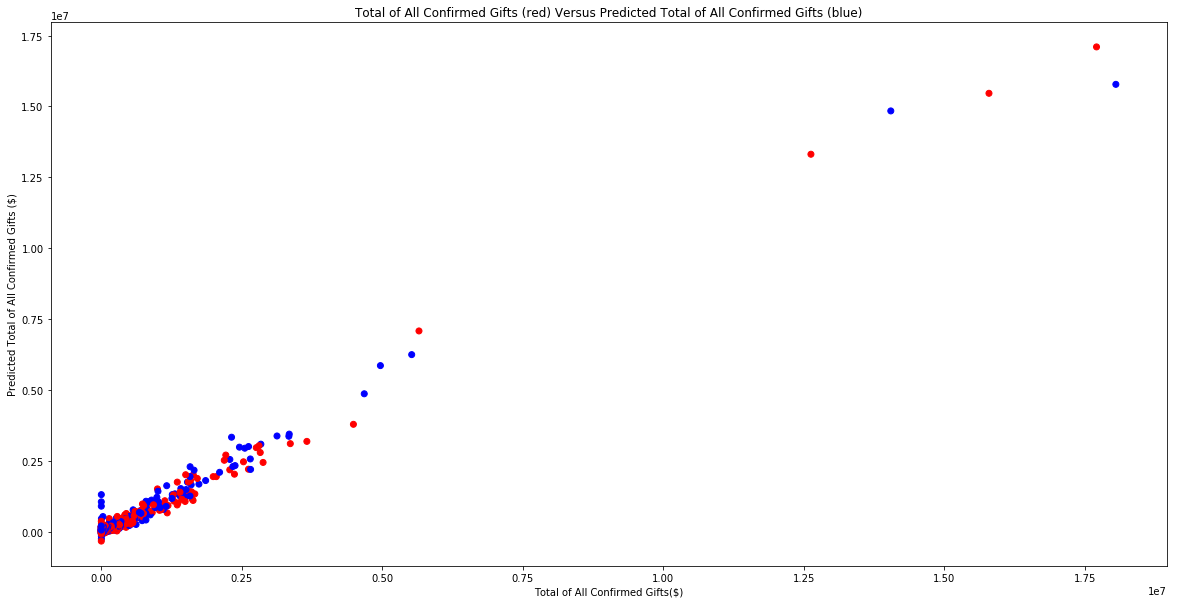

In [54]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue'])

plt.xlabel('Total of All Confirmed Gifts($)')
plt.title('Total of All Confirmed Gifts (red) Versus Predicted Total of All Confirmed Gifts (blue)')
plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

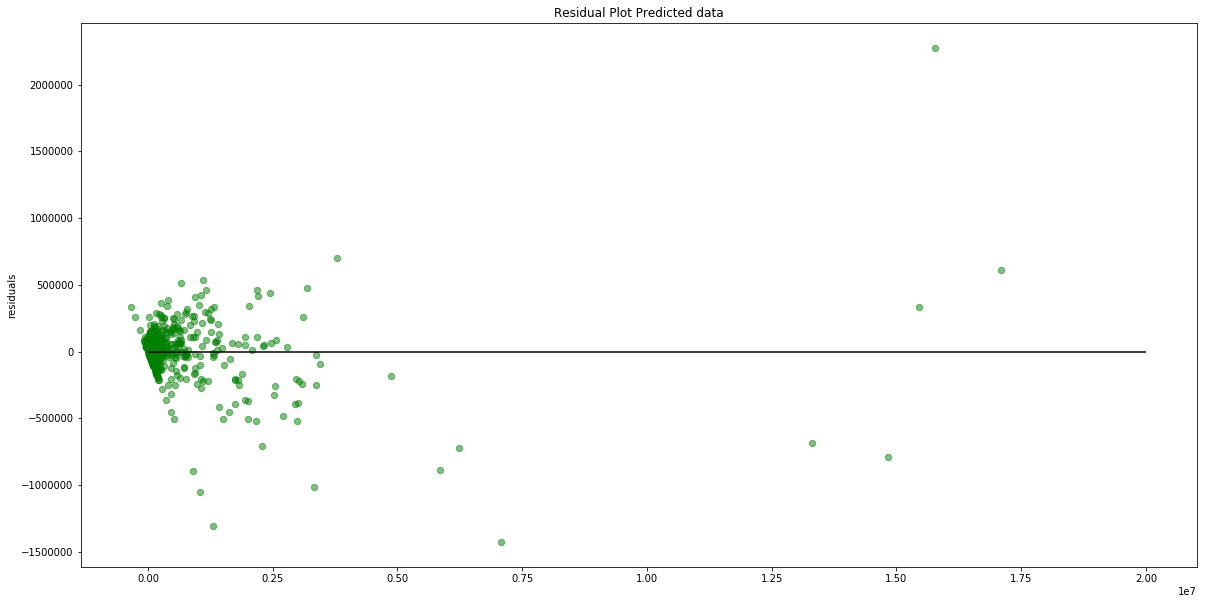

In [55]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=20000000)

plt.title('Residual Plot Predicted data')

plt.ylabel('residuals')


In [56]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [57]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:


# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.96


In [59]:
linreg.score(X_test, y_test)

0.96280767428514202

Text(0,0.5,'residuals')

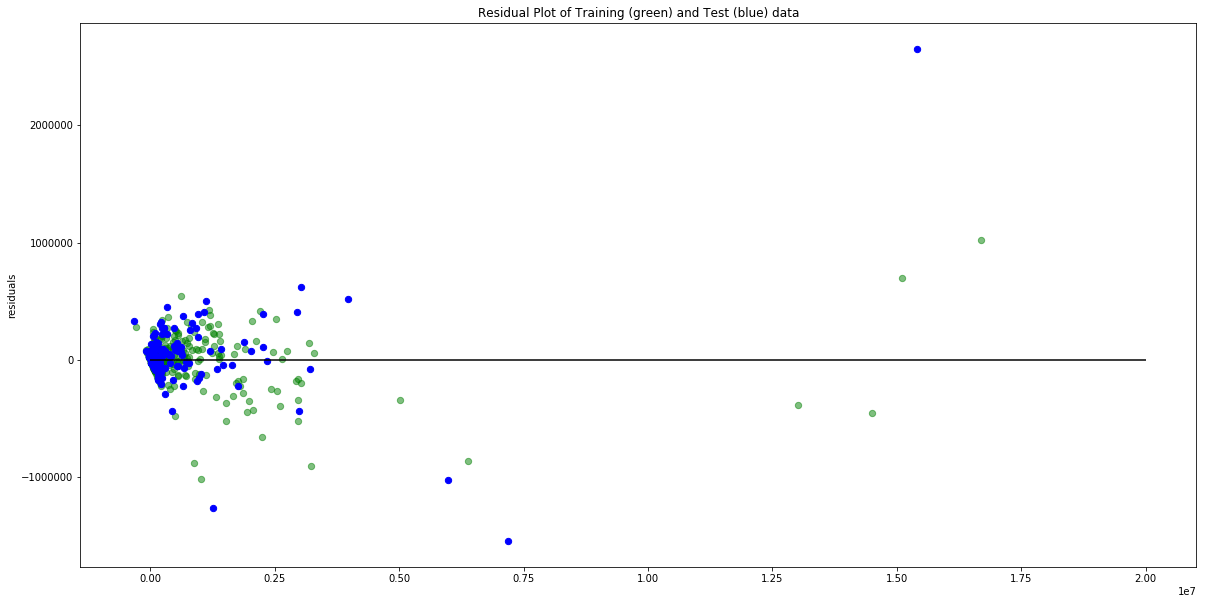

In [61]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=20000000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')


# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics